# 서울시 골목상권 탐색적 자료 분석 프로젝트

#### 메인 데이터 - 유동인구, 매출 + (상권 변화, 직장 인구, 거주 인구) (출처 - 서울 열린데이터 광장)
상권 데이터 탐색적 분석

1. 유동인구 분석
    - 구별
    - 상권별
    - 골목시장
2. 매출 분석
    - 구별
    - 직장 인구 상관관계
    - 종목별
    - 연령별
3. 유동인구와 매출 결합

In [1]:
import matplotlib.pyplot as plt

from matplotlib import pyplot

from matplotlib import font_manager

f_path = "C:\Windows\Fonts\Malgun.ttf"

font_manager.FontProperties(fname=f_path).get_name()

from matplotlib import rc

rc('font', family='Malgun Gothic')

# 1. 유동인구 데이터 분석

#### 서울시 유동인구 데이터 로드

In [2]:
pop = pd.read_csv("서울시 우리마을가게 상권분석서비스(상권-추정유동인구).csv", encoding='euc-kr')

#### 서울시 유동인구 2019년도 데이터 추출

In [3]:
pop_19 = pop[pop["기준 년코드"]==2019]

#### 서울시 상권 코드 데이터 로드

In [4]:
reg = pd.read_csv("서울시 우리마을가게 상권분석서비스(상권영역).csv", encoding="euc-kr")

#### 서울시 2019년도 유동인구 & 상권 코드 데이터 결합

In [5]:
join = pd.merge(pop_19, reg, on="상권_코드")

#### 시군구 코드 데이터 로드

In [6]:
code = pd.read_csv("서울특별시 건축물대장 법정동 코드정보.csv", encoding='euc-kr')
code = code[["시군구코드", "시군구명"]].drop_duplicates('시군구코드', keep='first')

#### 서울시 2019년도 유동인구 & 상권 코드 & 시군구 코드 데이터 결합

In [7]:
join2 = pd.merge(join, code, left_on="시군구_코드", right_on="시군구코드")
join2["구"] = [gu[:2] if len(gu)<=3 else gu[:3] for gu in join2['시군구명']]
join2

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명_x,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,...,상권_구분_코드_명,상권_코드_명_y,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,형태정보,시군구코드,시군구명,구
0,2019,1,A,골목상권,1000001,계동길,118266,61268,56997,10770,...,골목상권,계동길,198799,453610,11110,11110600,NaN,11110,종로구,종로
1,2019,2,A,골목상권,1000001,계동길,167204,82096,85105,13428,...,골목상권,계동길,198799,453610,11110,11110600,NaN,11110,종로구,종로
2,2019,1,A,골목상권,1000002,난계로27길,246619,147358,99261,11348,...,골목상권,난계로27길,201996,452630,11110,11110710,NaN,11110,종로구,종로
3,2019,2,A,골목상권,1000002,난계로27길,303115,179132,123984,13206,...,골목상권,난계로27길,201996,452630,11110,11110710,NaN,11110,종로구,종로
4,2019,1,A,골목상권,1000003,돈화문로11가길,144480,80073,64407,4000,...,골목상권,돈화문로11가길,198977,452902,11110,11110615,NaN,11110,종로구,종로
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2019,2,R,전통시장,1001488,성내골목시장,106568,50990,55576,3398,...,전통시장,성내골목시장,211277,448270,11740,11740650,NaN,11740,강동구,강동
2986,2019,1,R,전통시장,1001489,둔촌역전통시장,117179,62462,54717,7901,...,전통시장,둔촌역전통시장,211974,447590,11740,11740660,NaN,11740,강동구,강동
2987,2019,2,R,전통시장,1001489,둔촌역전통시장,124179,64572,59605,8444,...,전통시장,둔촌역전통시장,211974,447590,11740,11740660,NaN,11740,강동구,강동
2988,2019,1,R,전통시장,1001490,길동복조리시장,206428,104505,101924,12979,...,전통시장,길동복조리시장,212698,448781,11740,11740685,NaN,11740,강동구,강동


## a. 구별 유동인구 분석

### 성별&전체 유동인구 비교
- 성별에 분류한 그래프에서는 특이점을 발견하기 힘듬
- 구별 유동인구 성별 비율이 50대 50에 근접함

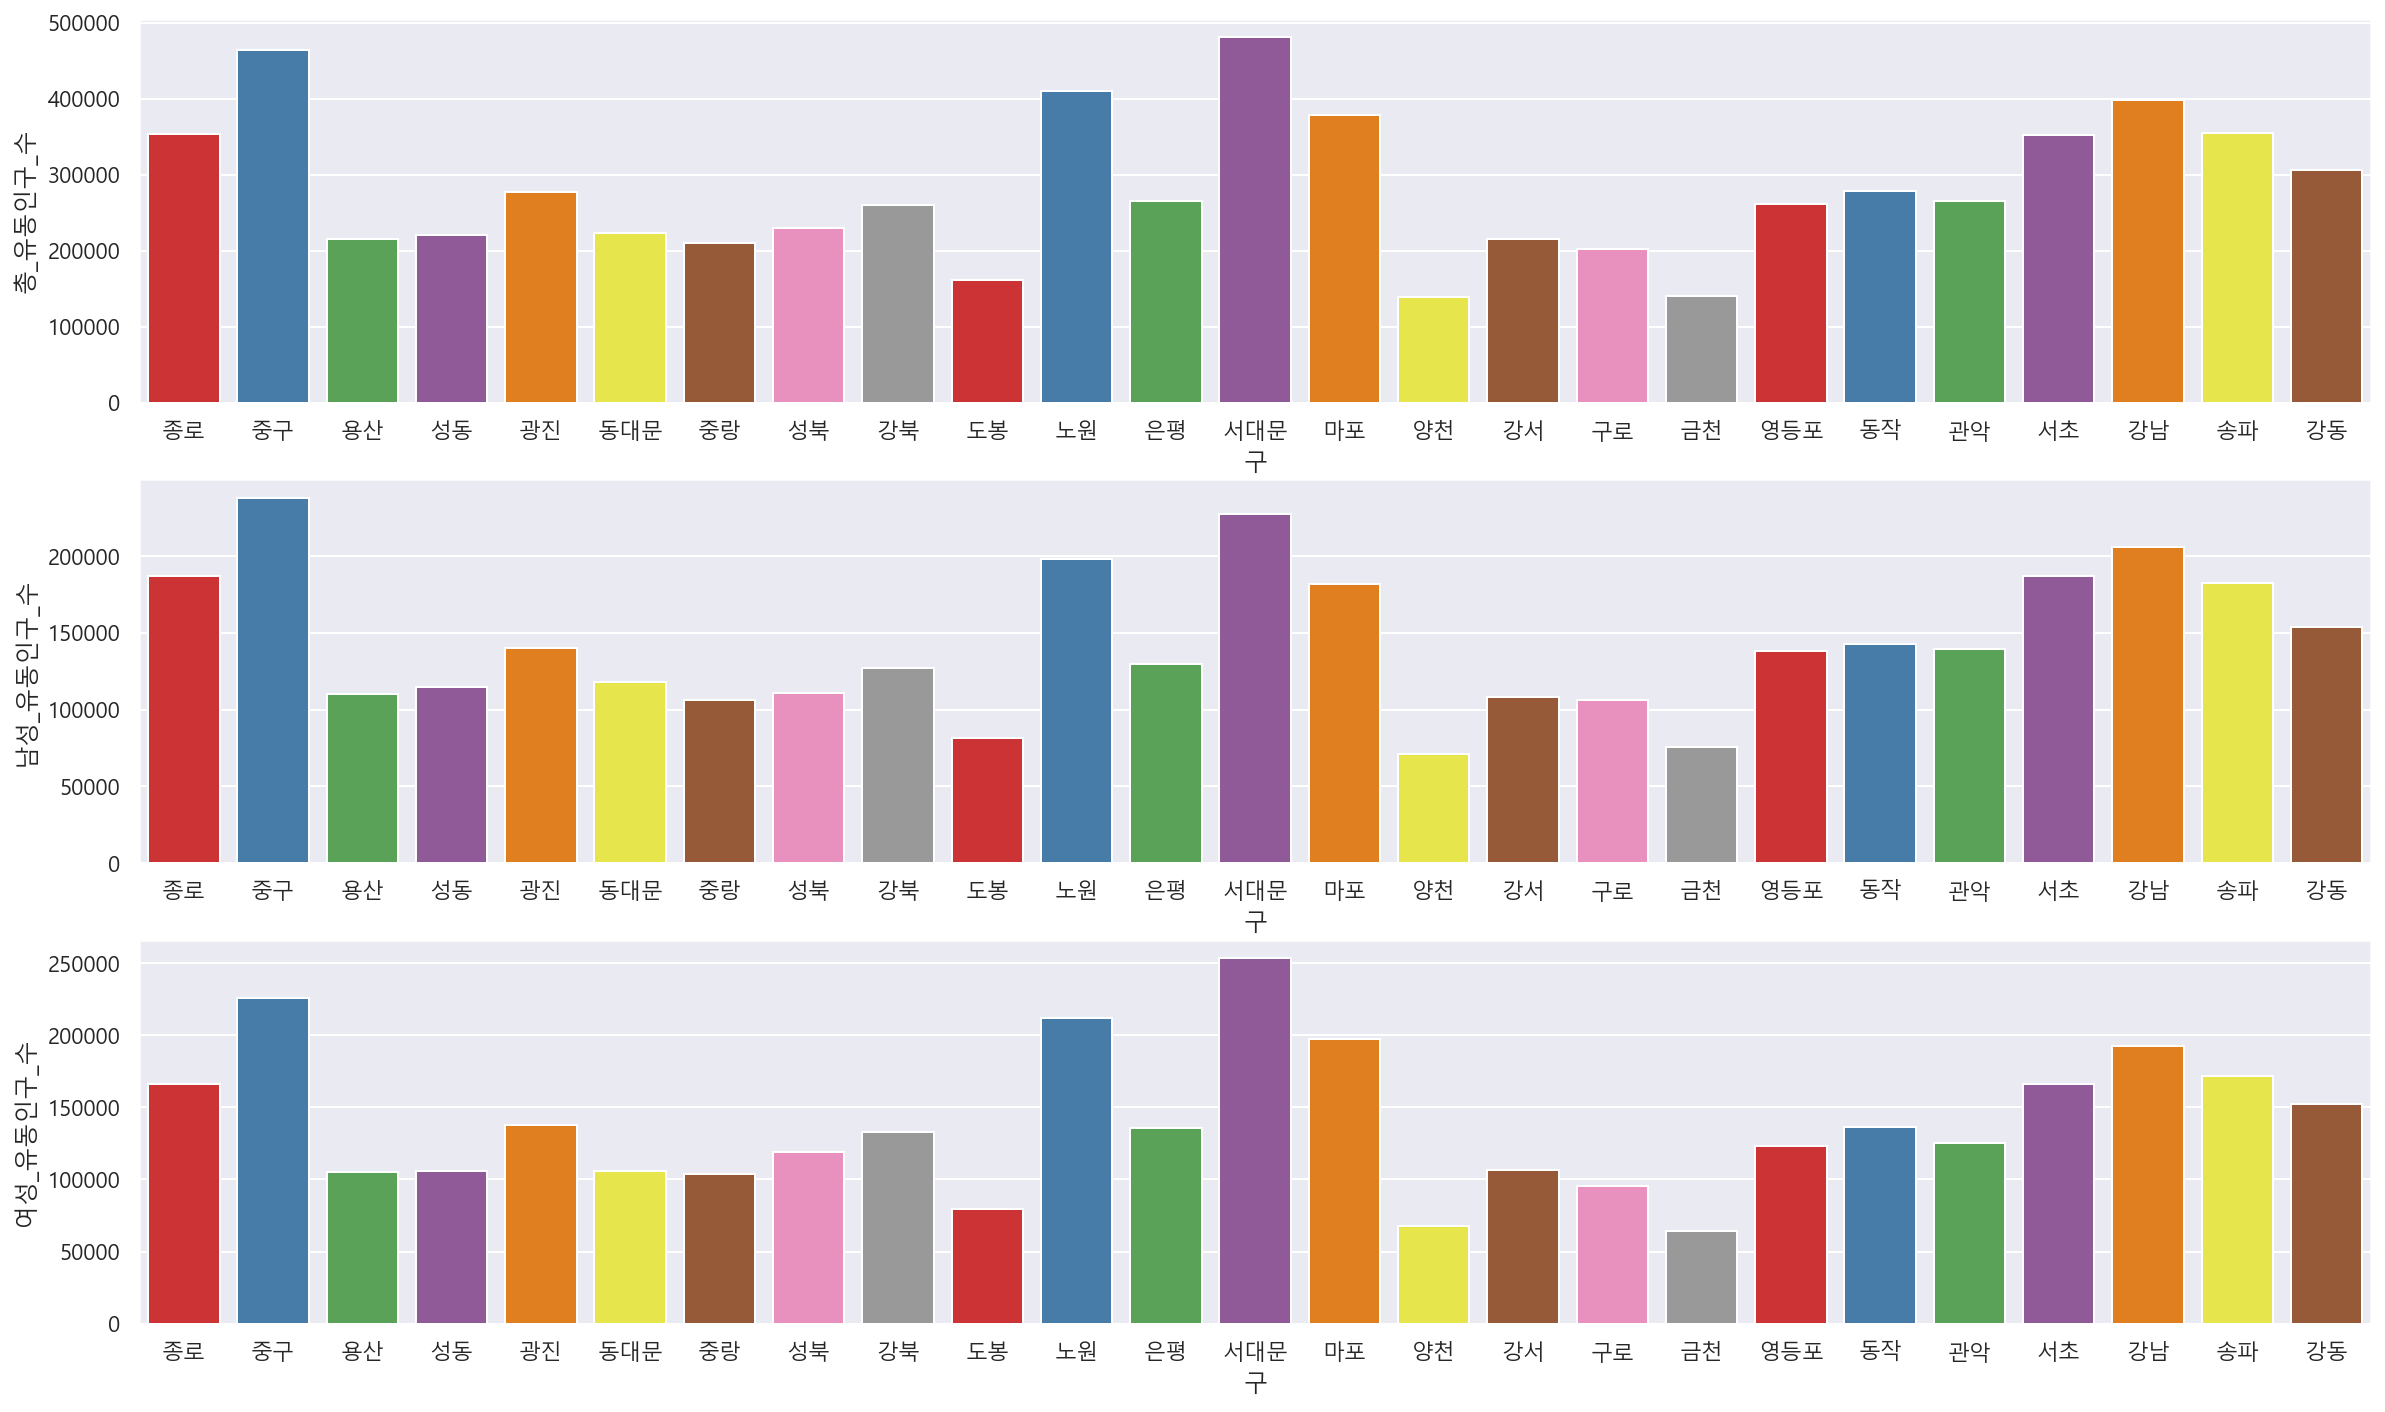

In [8]:
fig, ax = plt.subplots(3,1,figsize=(20, 12))
sns.barplot(x='구', y='총_유동인구_수', data = join2, ci = None, ax=ax[0], palette="Set1")
sns.barplot(x='구', y='남성_유동인구_수', data = join2, ci = None, ax=ax[1], palette="Set1")
sns.barplot(x='구', y='여성_유동인구_수', data = join2, ci = None, ax=ax[2], palette="Set1")
plt.show()

### 월요일&전체 유동인구 비교
- 요일도 마찬가지로 특이점을 찾기 힘듬

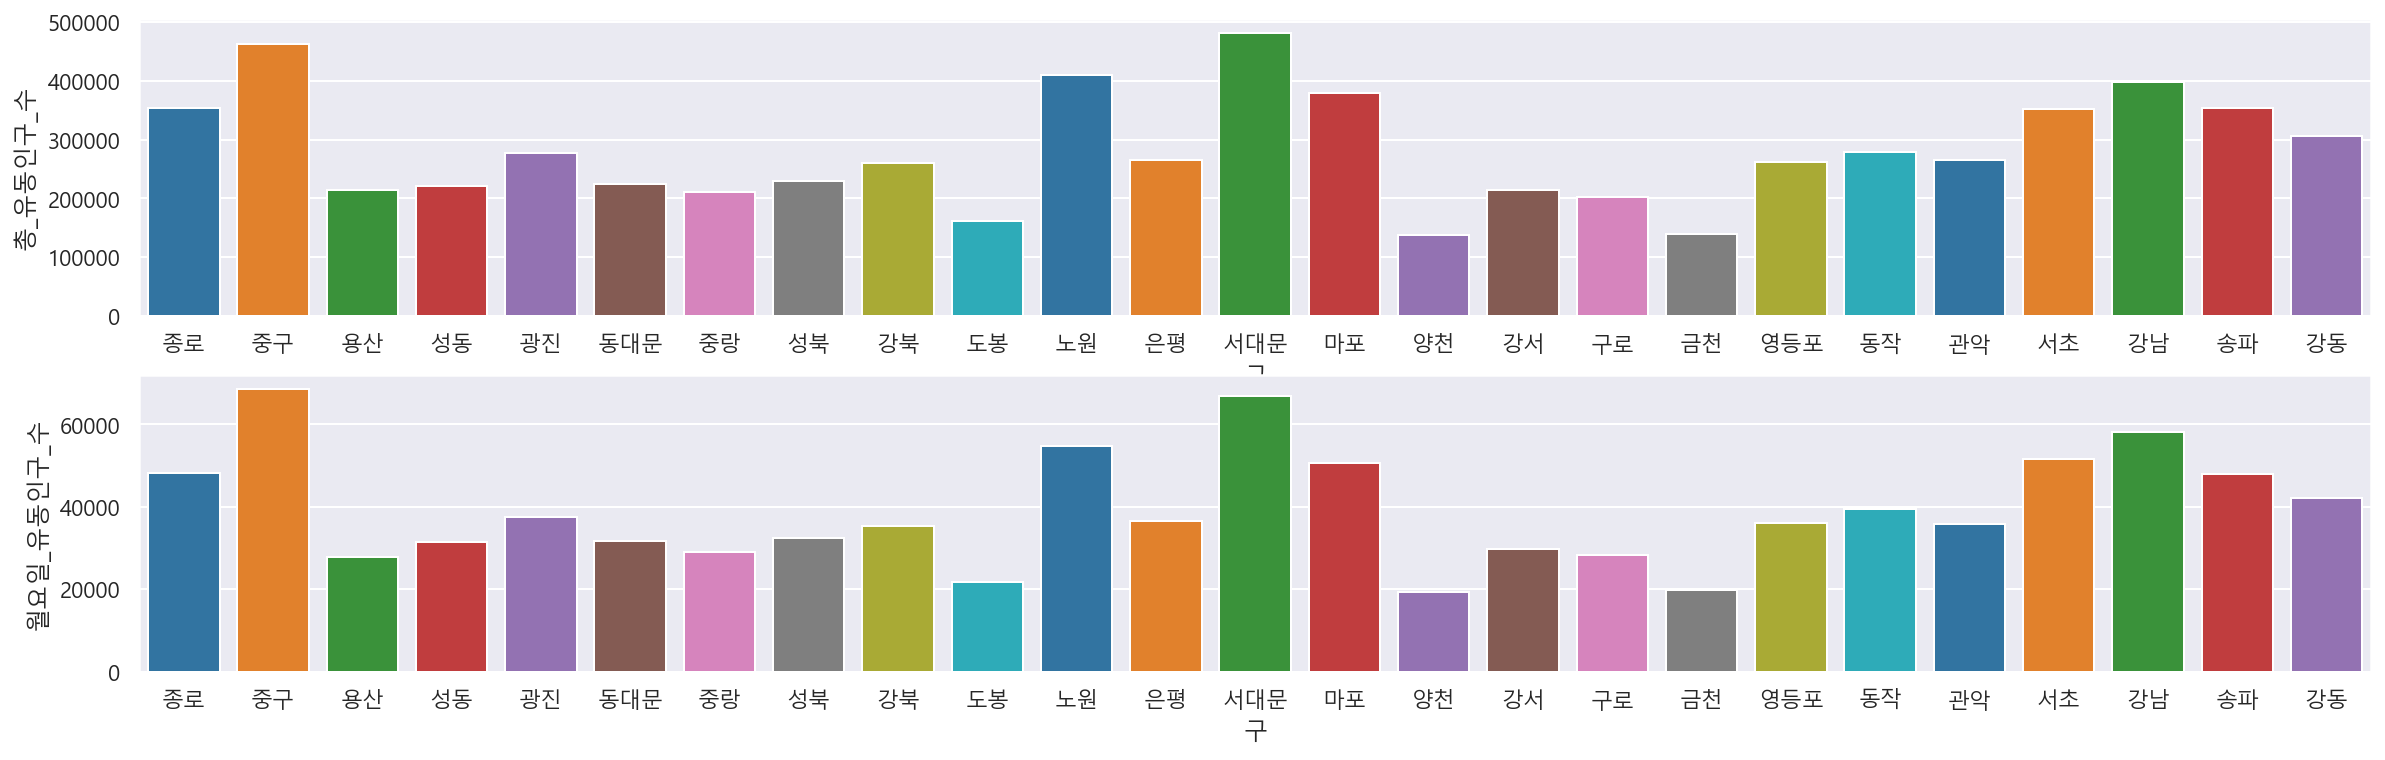

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(20, 6))
sns.barplot(x='구', y='총_유동인구_수', data = join2, ci = None, ax=ax[0], palette="tab10")
sns.barplot(x='구', y='월요일_유동인구_수', data = join2, ci = None, ax=ax[1], palette="tab10")
plt.show()

### 10대&전체 유동인구 비교
- 10대 유동인구 그래프는 전체 유동인구 그래프와 다른 양상을 띈다.

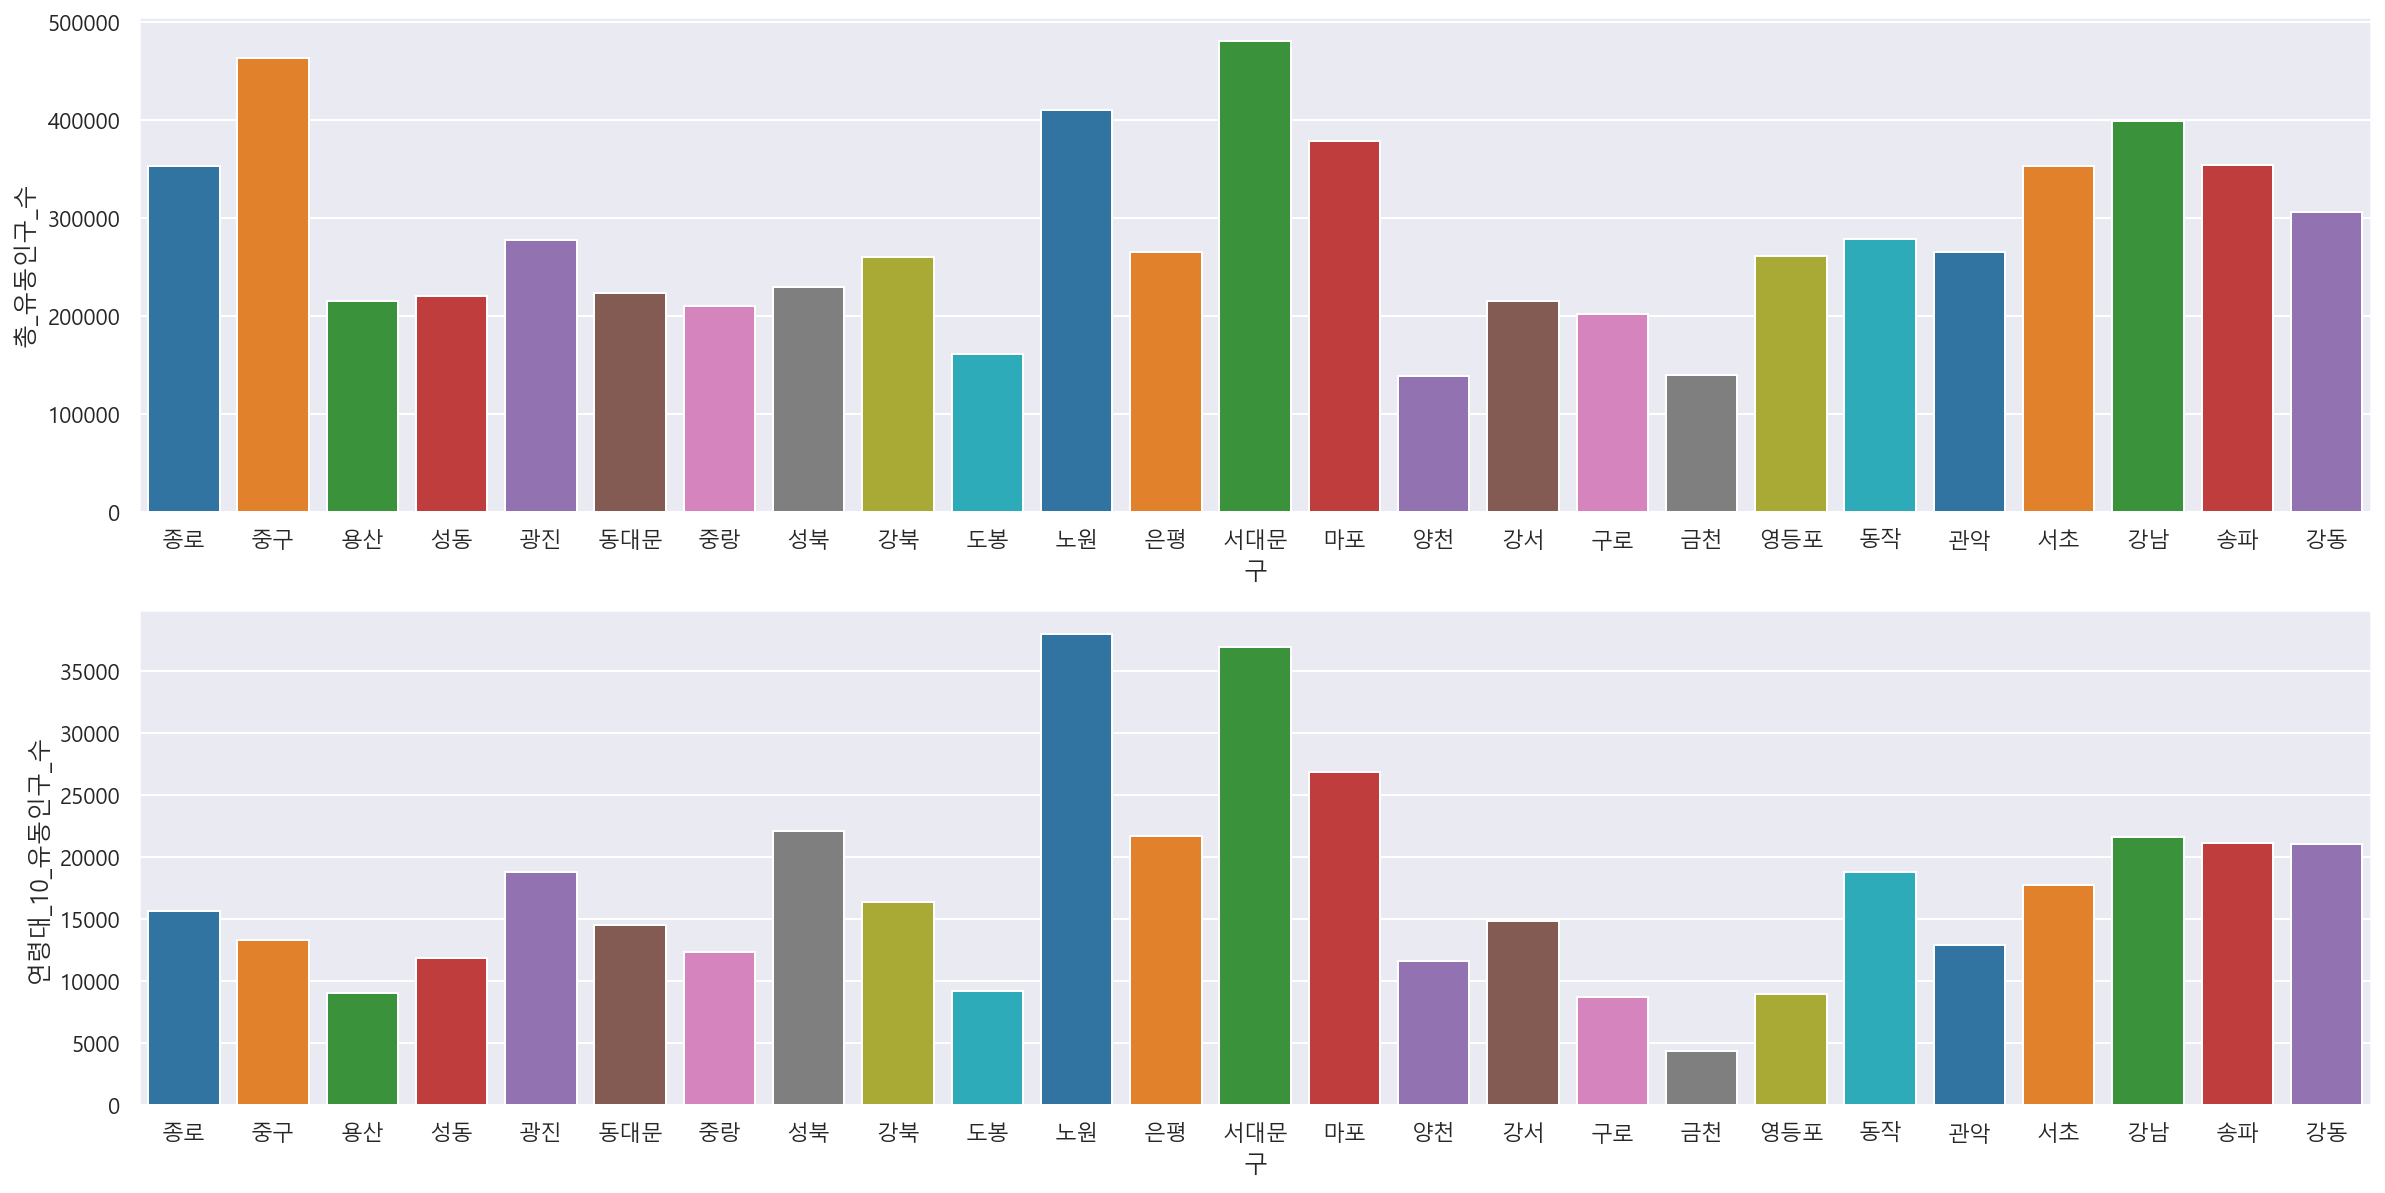

In [10]:
fig, ax = plt.subplots(2,1,figsize=(20, 10))
sns.barplot(x='구', y='총_유동인구_수', data = join2, ci = None, ax=ax[0], palette="tab10")
sns.barplot(x='구', y='연령대_10_유동인구_수', data = join2, ci = None, ax=ax[1], palette="tab10")
plt.show()

### 서울시 10대 유동인구 비율 대비 구 10대 유동인구 비율
- 정확한 비교를 위해 비율로 표현함
- 노원, 성북, 양천, 은평 등에서 10대의 비율이 상대적으로 높고 금천, 영등포, 중구 등에서 10대의 비율이 상대적으로 낮다.

In [11]:
test = pd.pivot_table(join2, index='구', aggfunc=np.sum).reset_index()
test["10_구_인구_비율"] = round(test["연령대_10_유동인구_수"] / test["연령대_10_유동인구_수"].sum() * 100, 2)
test["구_인구_비율"] = round(test["총_유동인구_수"] / test["총_유동인구_수"].sum() * 100, 2)
test["10_총_차이"] = round(test["10_구_인구_비율"] / test["구_인구_비율"] * 100, 2)

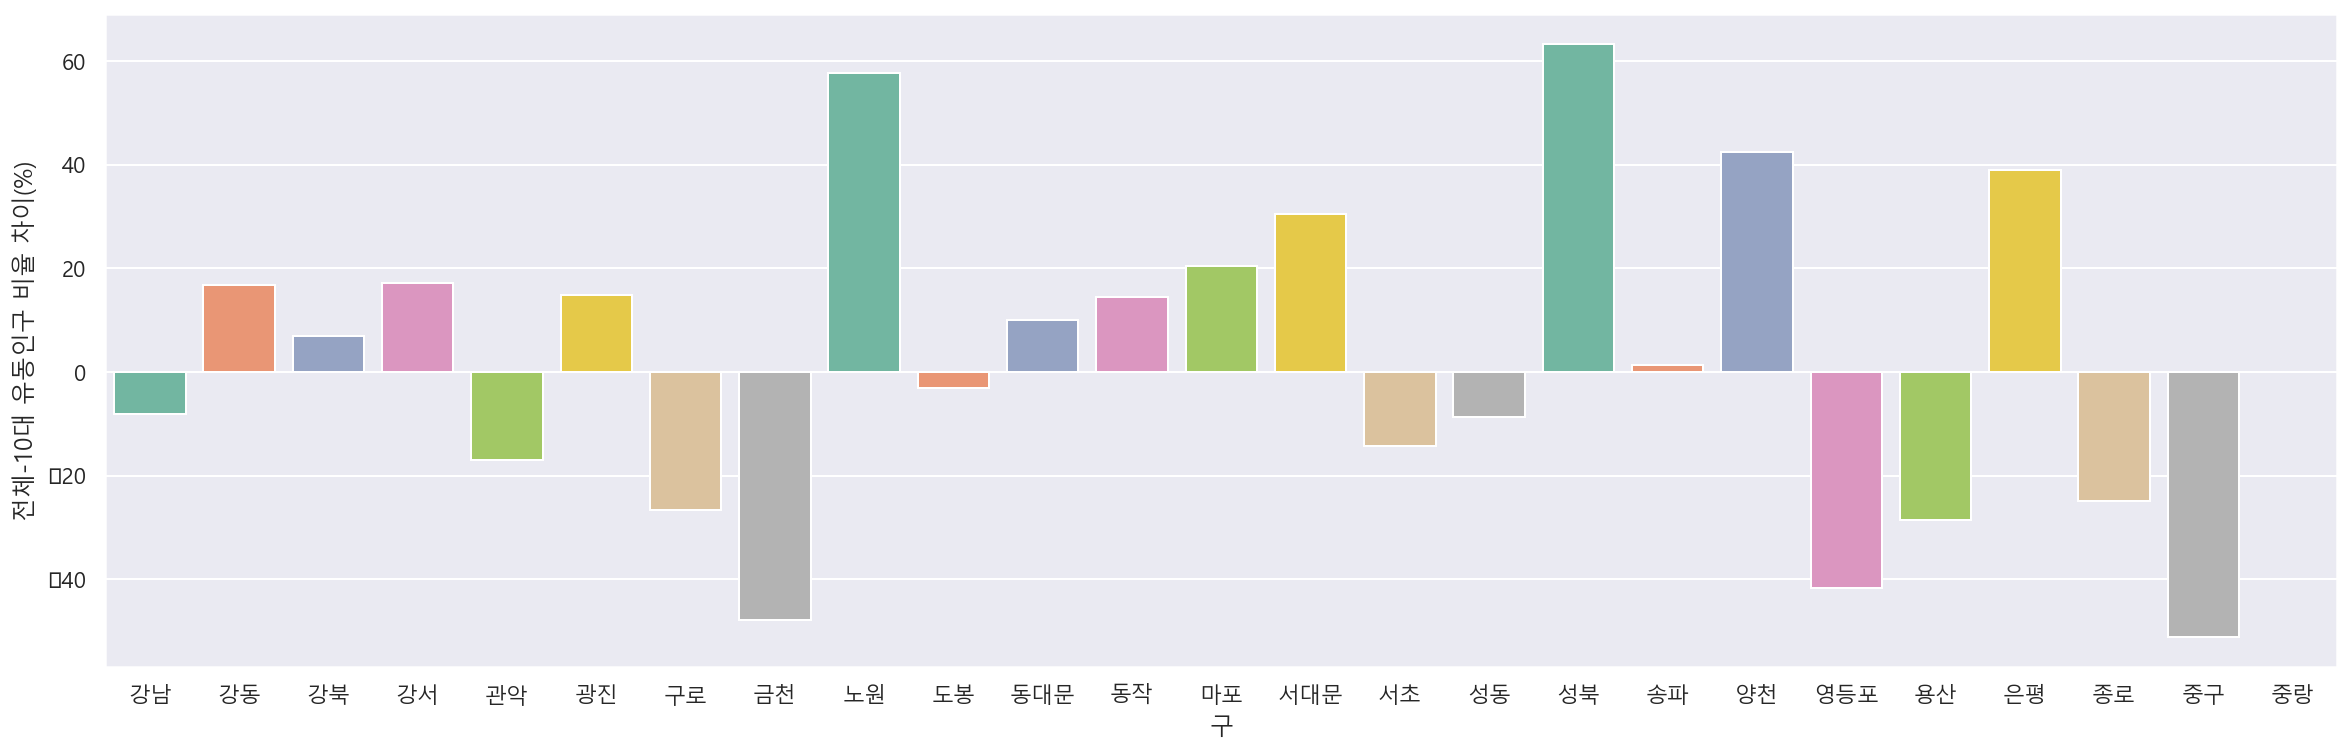

In [12]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x=test['구'], y=test["10_총_차이"]-100, data = test, ci = None, palette="Set2")
ax.set_ylabel("전체-10대 유동인구 비율 차이(%)")
plt.show()

### 10대 지역 거주 & 골목시장 유동인구 비율 비교
- 위 자료에서 금천, 영등포, 중구의 10대 유동인구 비율이 낮게 나왔다.
- 혹시 거주자 중 10대 비율이 낮아서 유동인구 비율이 낮은걸까?
- 2019년 인구 데이터랑 비교해보자 
- 대부분의 구에서 10대 유동인구 비율은 해당 지역 10대 거주 인구 비율보다도 낮다.(성북구 제외)

In [13]:
age = pd.read_csv("report1.txt", sep='\t')
age["계"] = [int(age.replace(",","")) for age in age["계"]]
age["10~14세"] = [int(age.replace(",","")) for age in age["10~14세"]]
age["15~19세"] = [int(age.replace(",","")) for age in age["15~19세"]]
age["10대_거주_비율"] = round((age["10~14세"] + age["15~19세"]) / age["계"] * 100, 2)
age_tot = age[age["구분"] == "계"].reset_index()
age_tot["구"] = [gu[:2] if len(gu)<=3 else gu[:3] for gu in age_tot['행정구역별']]
test["10_유동인구_비율"] = round(test["연령대_10_유동인구_수"] / test["총_유동인구_수"] * 100, 2)
teen = pd.merge(test[["구", "10_유동인구_비율"]], age_tot[["구", "10대_거주_비율"]], on="구")

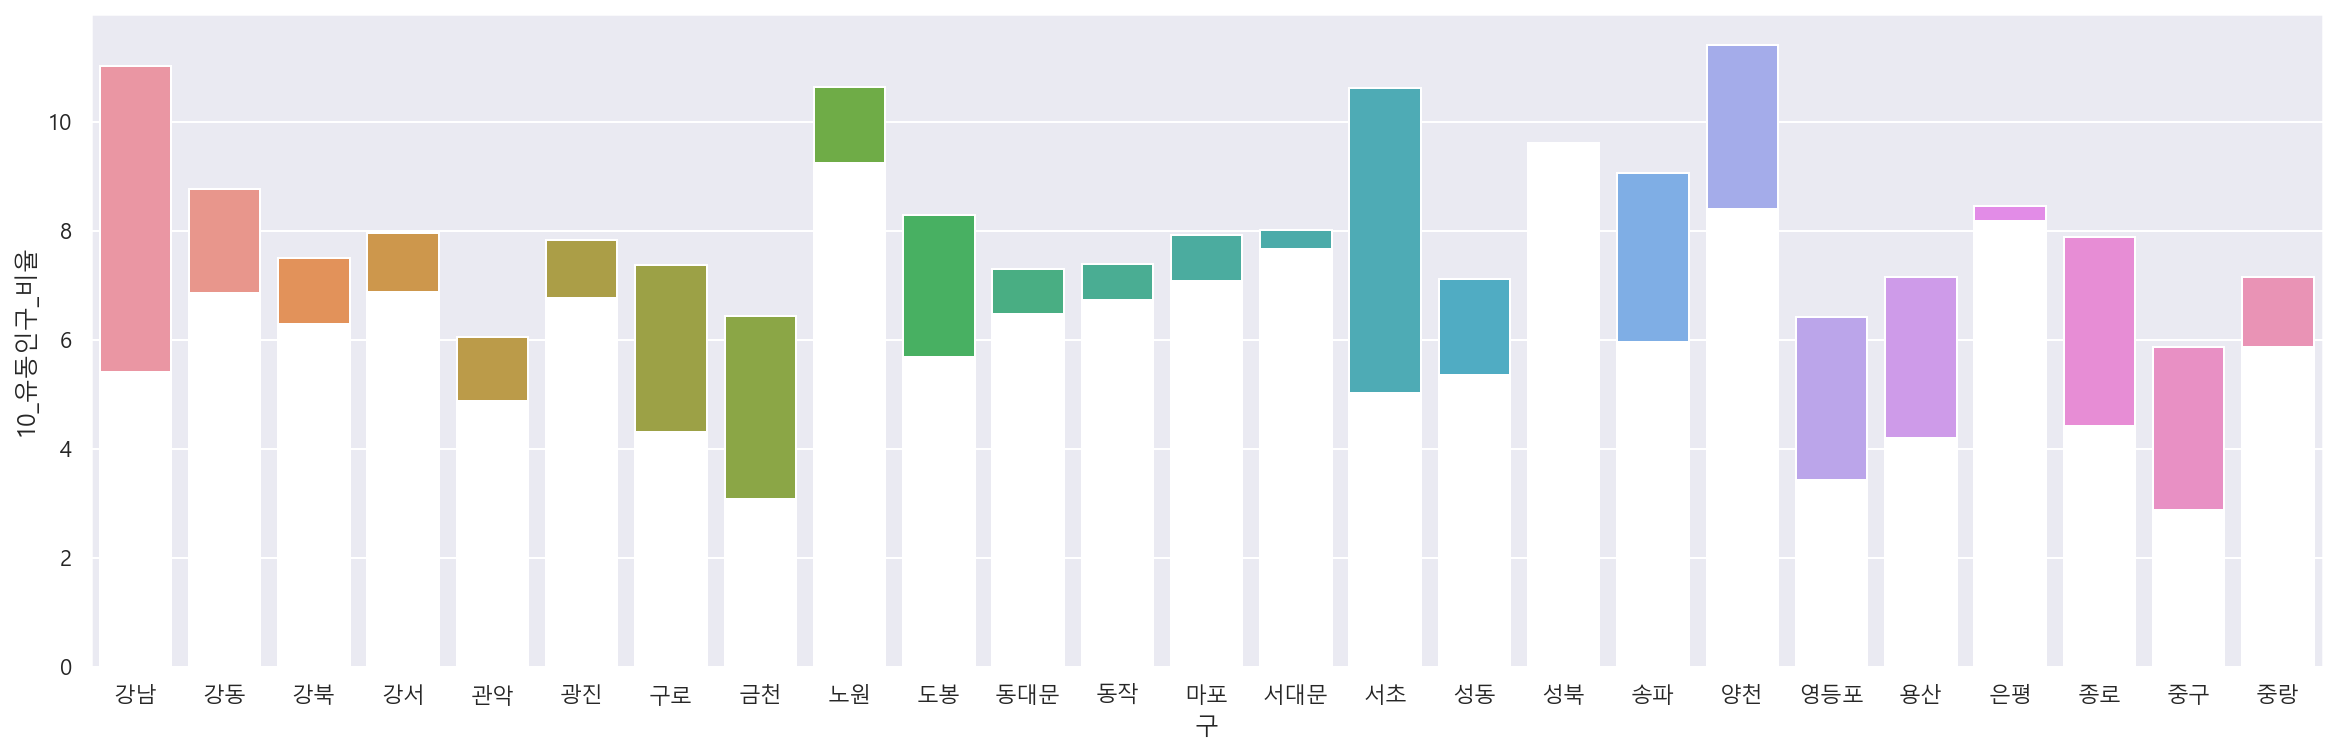

In [14]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x='구', y='10대_거주_비율', data = teen, ci = None)
sns.barplot(x='구', y='10_유동인구_비율', data = teen, ci = None, color = 'W')
plt.show()

### 구별 10대 유동인구수 상세 분석
- 가장 유동인구가 많았던 노원과 서대문구를 중점으로 관찰해보자
- 총 유동인구 수는 비슷하지만 노원구의 중위값, IQR이 더 크다.

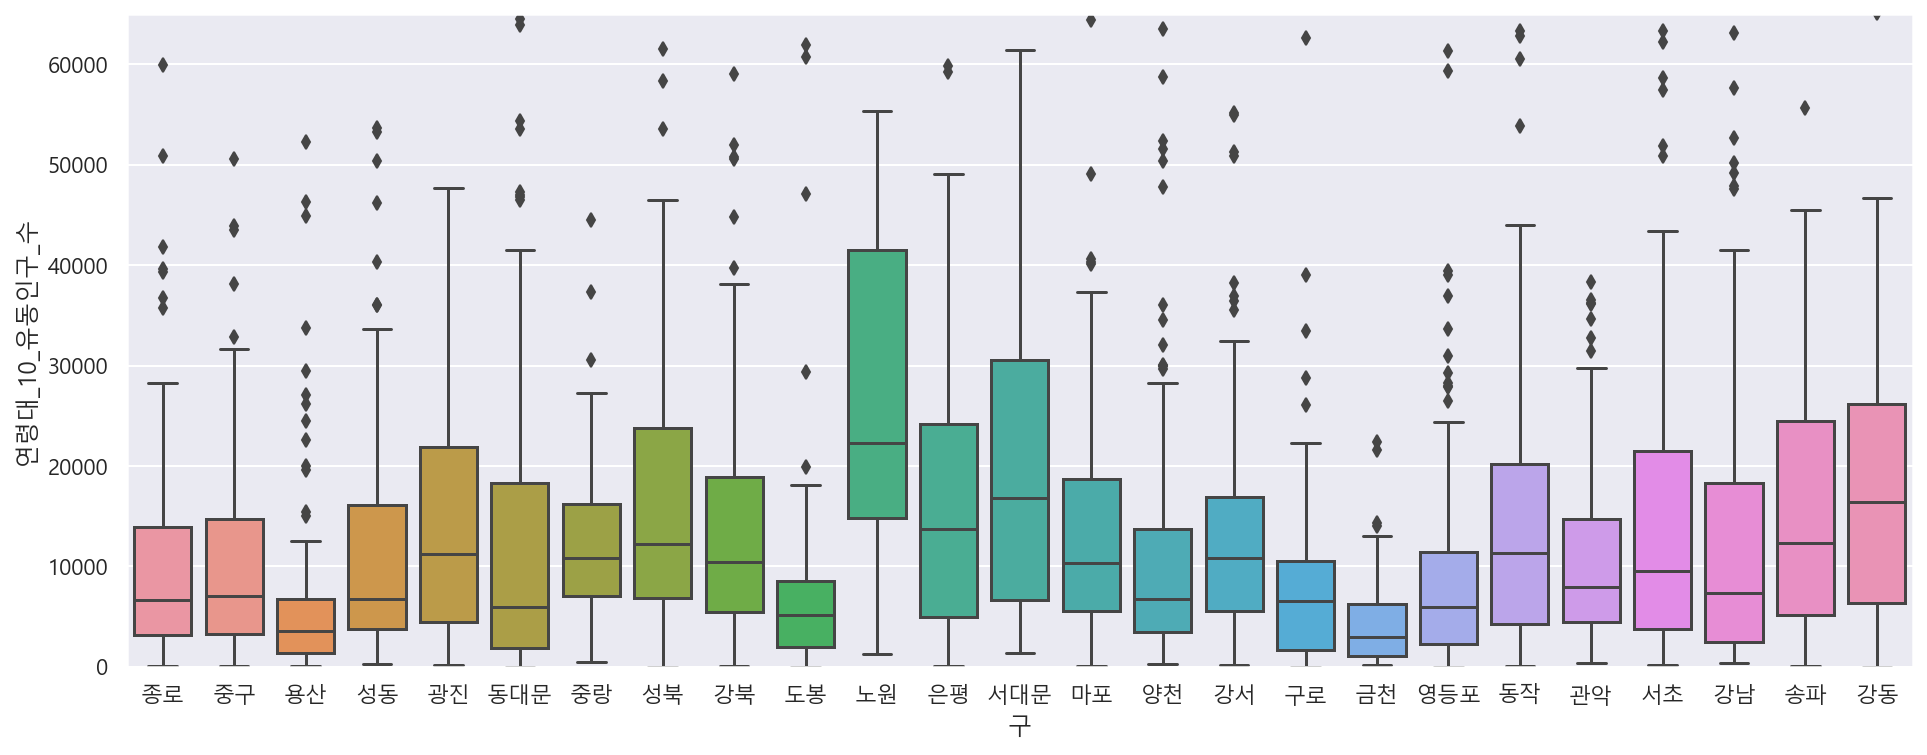

In [15]:
plt.figure(figsize=(16,6))
sns.boxplot(x="구", y="연령대_10_유동인구_수", data=join2)
plt.ylim([0,65000])
plt.show()

### 히트맵으로 본 10대 유동인구 분포
- 종로·청계 관광특구, 신촌, 홍대, 명동 등에 유동인구 밀집
- 위의 서대문구는 신촌이라는 outlier의 존재가 통계에 크게 작용함

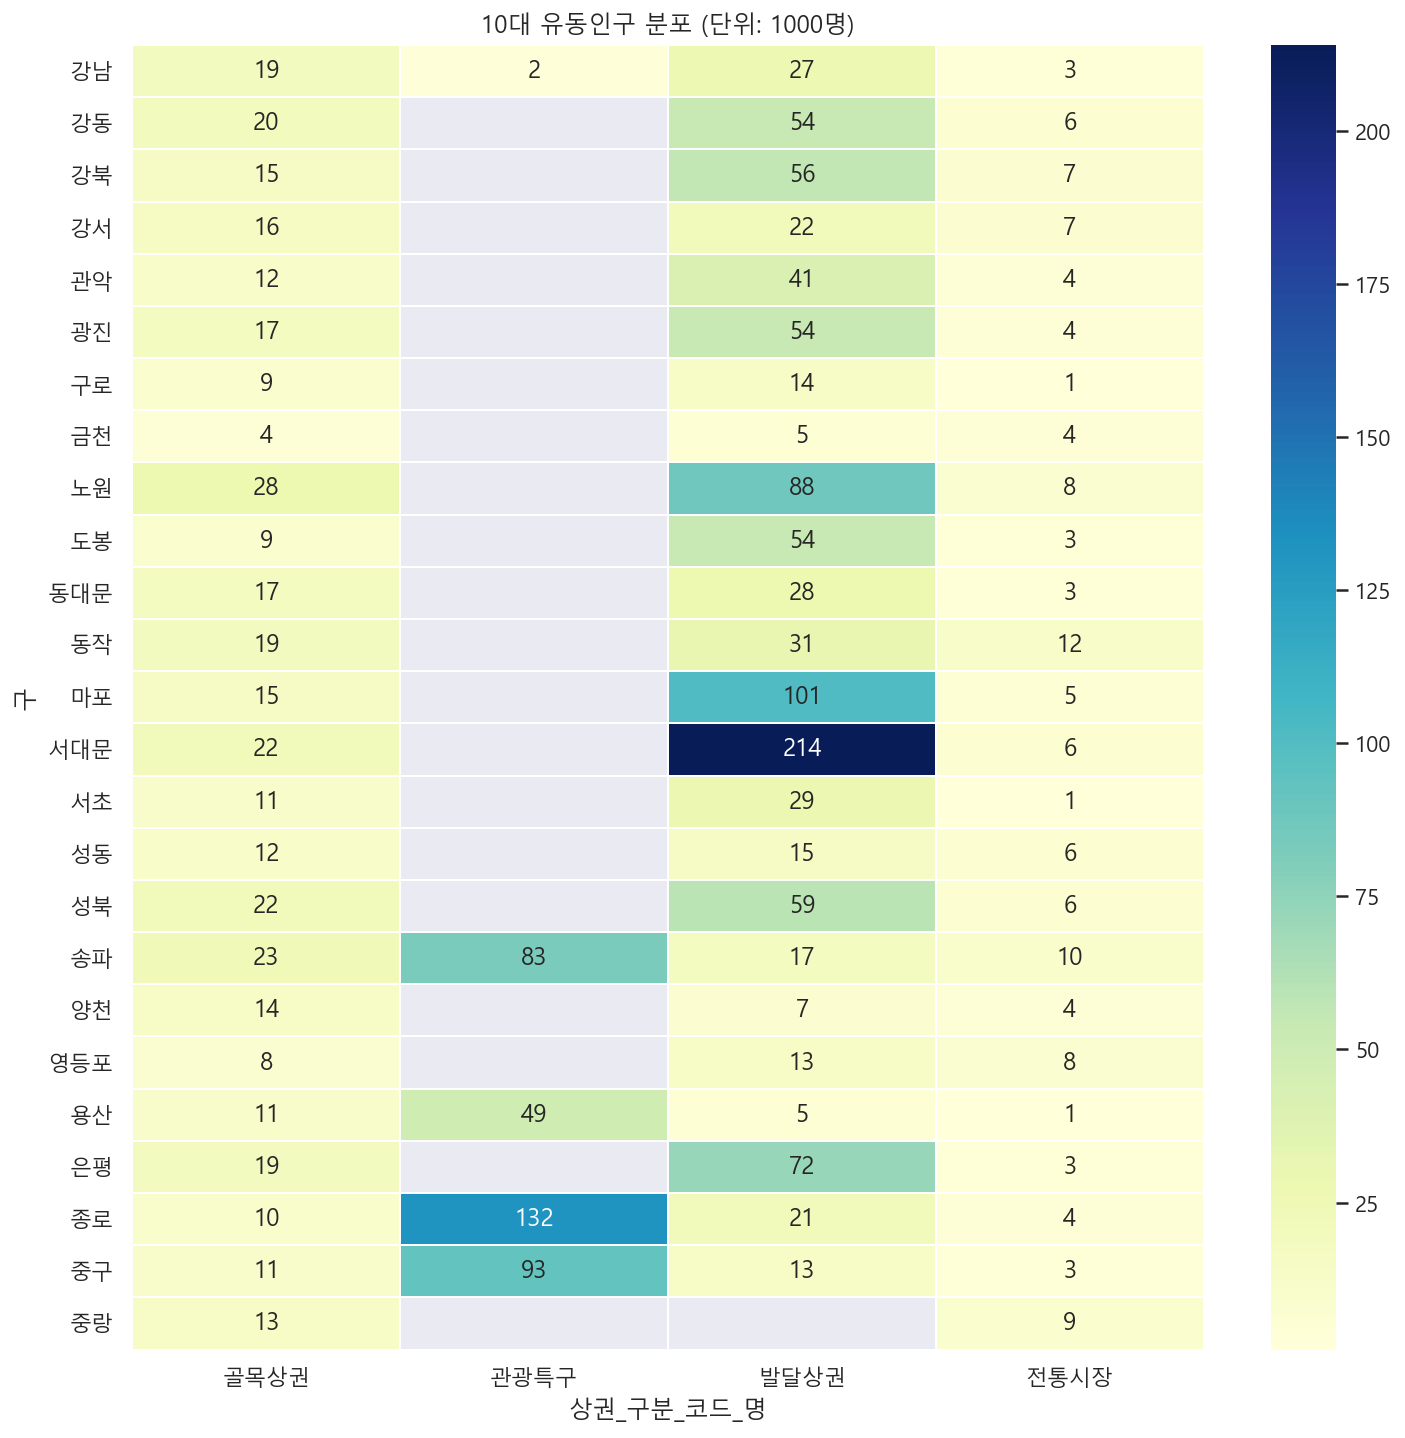

In [16]:
gu_10 = join2.pivot_table("연령대_10_유동인구_수", "구", "상권_구분_코드_명")
gu_10 = round(gu_10 / 1000)

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(gu_10, annot=True, linewidths=.5, fmt=".0f", cmap="YlGnBu")
plt.title("10대 유동인구 분포 (단위: 1000명)")
plt.show()

### 20대

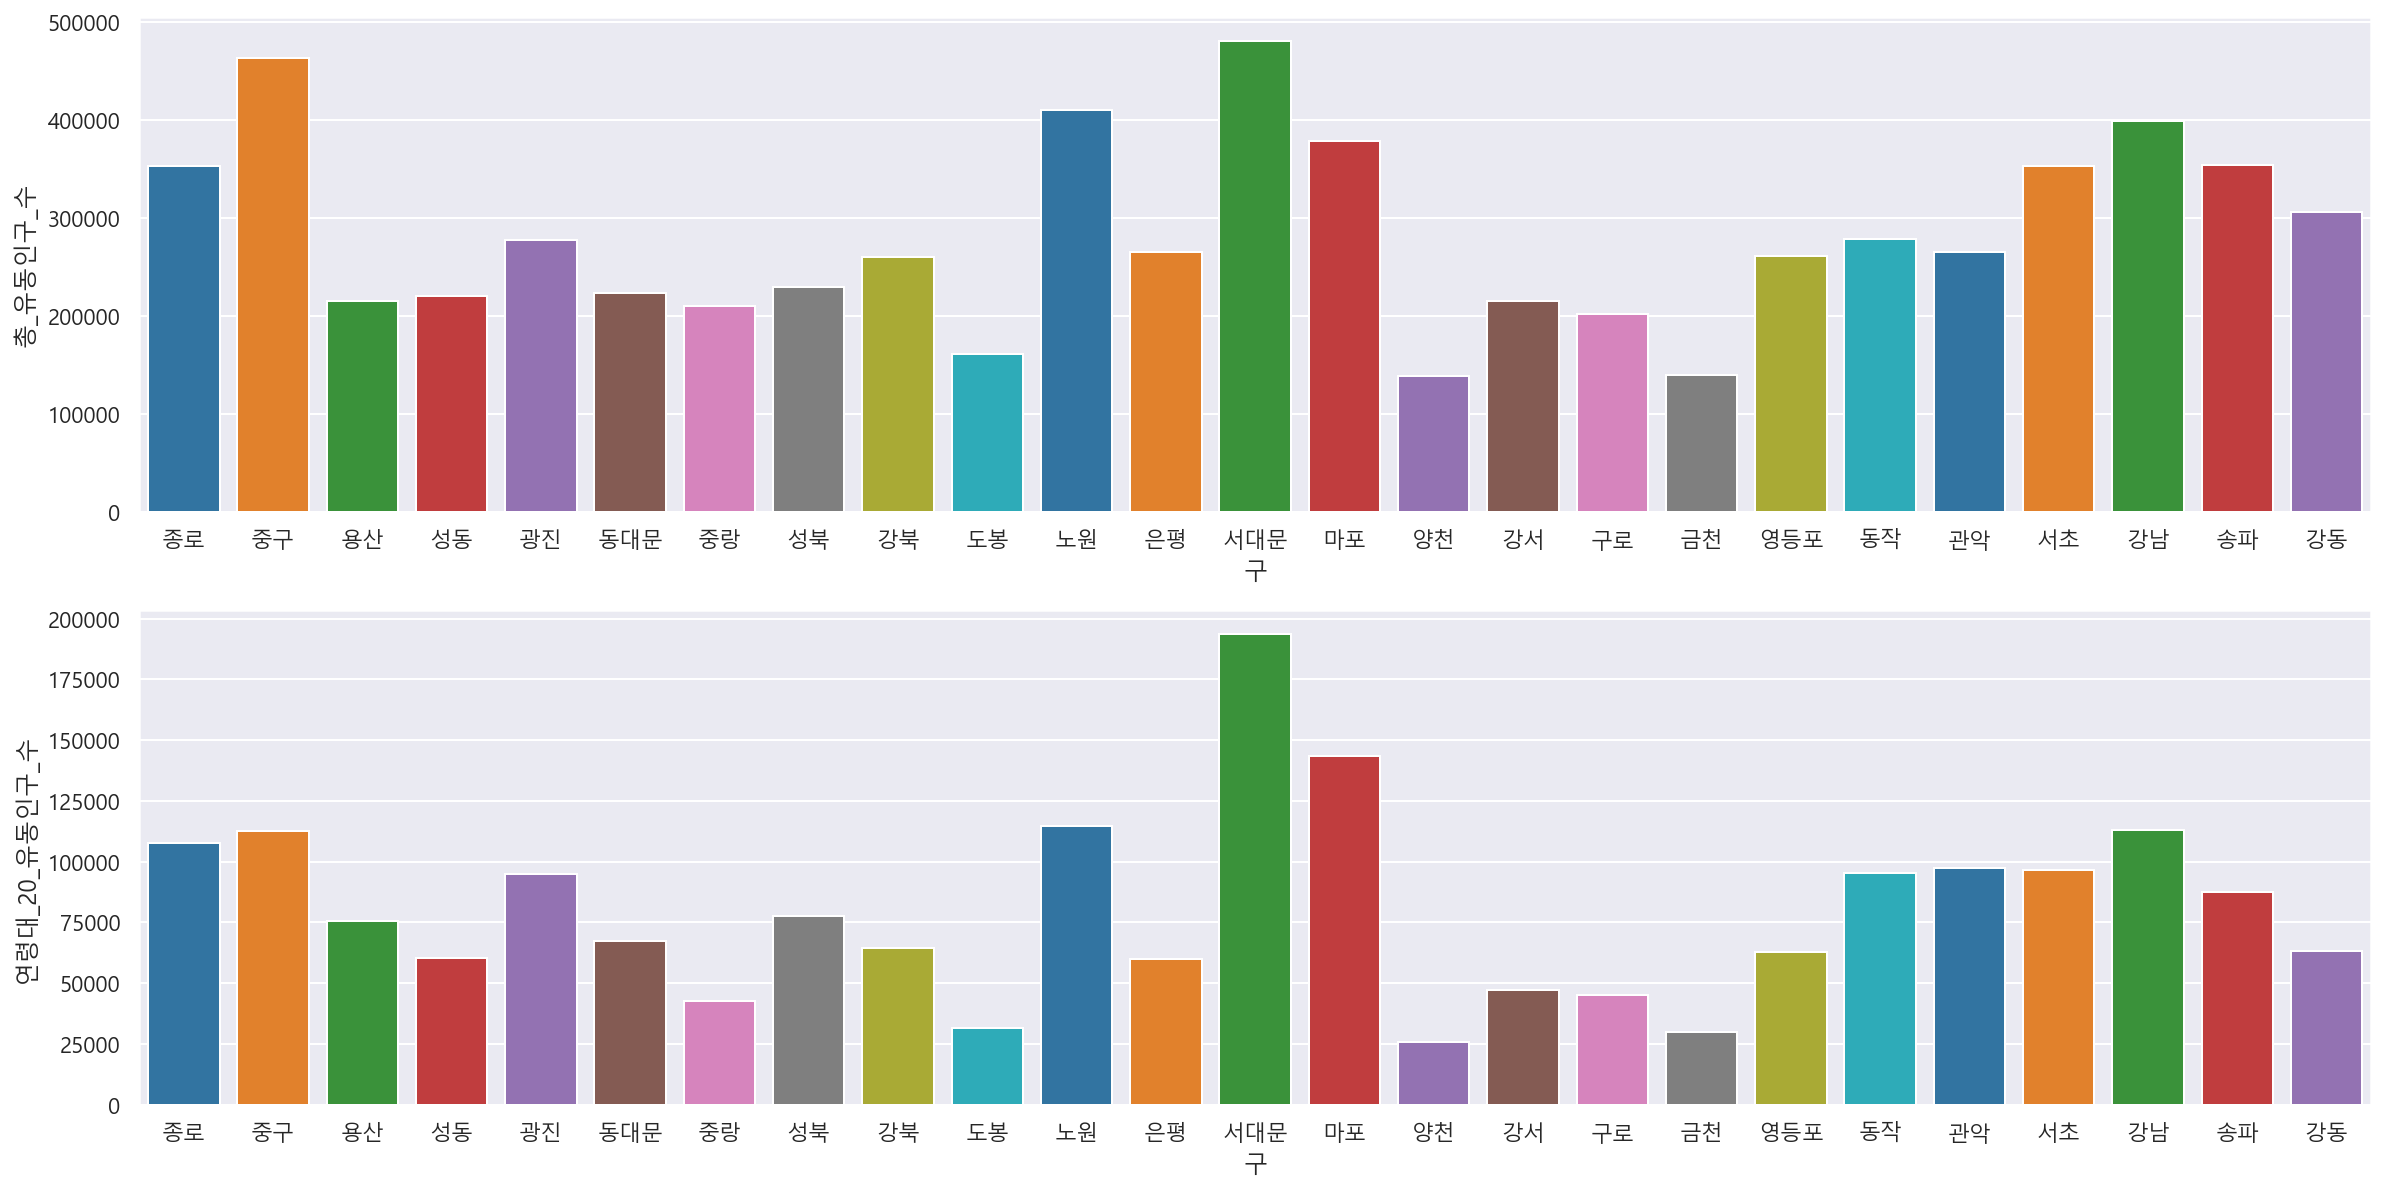

In [17]:
fig, ax = plt.subplots(2,1,figsize=(20, 10))
sns.barplot(x='구', y='총_유동인구_수', data = join2, ci = None, ax=ax[0], palette="tab10")
sns.barplot(x='구', y='연령대_20_유동인구_수', data = join2, ci = None, ax=ax[1], palette="tab10")
plt.show()

## b. 상권별 데이터 분석

### 구 피봇테이블

In [18]:
pivot = pd.pivot_table(join2, index='구', aggfunc=np.sum)

### 상권별 피봇테이블 ver 0.1

In [19]:
pivot2 = pd.pivot_table(join2, index=' 상권_구분_코드_명', aggfunc=np.sum)

### 상권별 피봇테이블 ver 0.2

In [20]:
pivot3 = pd.pivot_table(join2, columns=' 상권_구분_코드_명', aggfunc=np.sum)

### 상권별 피봇테이블 유동인구 비율 추가 ver 0.3

In [21]:
pivot3.loc["10_유동인구_비율"] = round(pivot3.loc["연령대_10_유동인구_수"] / pivot3.loc["총_유동인구_수"] * 100, 2)
pivot3.loc["20_유동인구_비율"] = round(pivot3.loc["연령대_20_유동인구_수"] / pivot3.loc["총_유동인구_수"] * 100, 2)
pivot3.loc["30_유동인구_비율"] = round(pivot3.loc["연령대_30_유동인구_수"] / pivot3.loc["총_유동인구_수"] * 100, 2)
pivot3.loc["40_유동인구_비율"] = round(pivot3.loc["연령대_40_유동인구_수"] / pivot3.loc["총_유동인구_수"] * 100, 2)
pivot3.loc["50_유동인구_비율"] = round(pivot3.loc["연령대_50_유동인구_수"] / pivot3.loc["총_유동인구_수"] * 100, 2)
pivot3.loc["60_이상_유동인구_비율"] = round(pivot3.loc["연령대_60_이상_유동인구_수"] / pivot3.loc["총_유동인구_수"] * 100, 2)

### 상권&연령별 유동인구 비율 그래프
- 관광특구, 발달상권은 2,30대 유동인구 비율이 높고 전통시장, 골목상권은 50대 이상 비율이 높다.

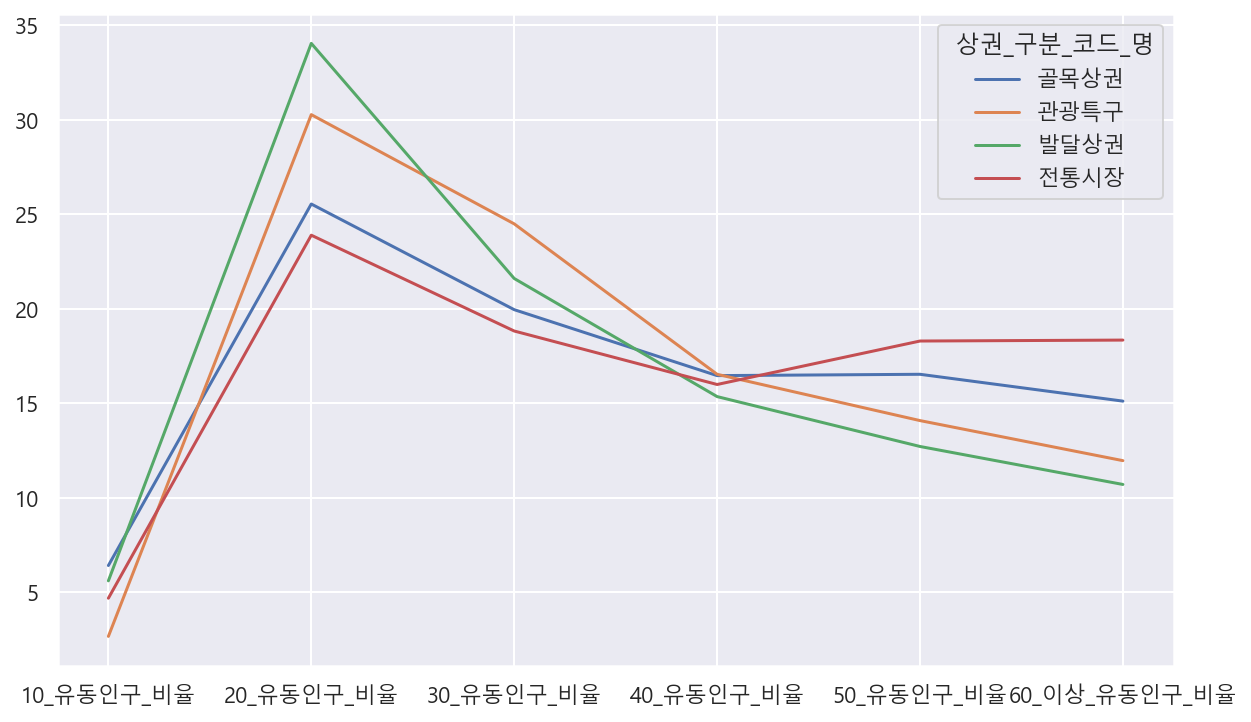

In [22]:
pivot3.loc[["10_유동인구_비율","20_유동인구_비율","30_유동인구_비율","40_유동인구_비율","50_유동인구_비율","60_이상_유동인구_비율"]].plot(figsize=(10,6))
plt.show()

### 상권&시간대별 피봇테이블 월요일 20대 남성 유동 인구 비율 추가 ver 0.4

In [23]:
pivot3.loc["남성연령대_20_월요일_유동인구_수"] = pivot3.loc["남성연령대_20_월요일시간대_1_유동인구_수"] + pivot3.loc["남성연령대_20_월요일시간대_2_유동인구_수"] + pivot3.loc["남성연령대_20_월요일시간대_3_유동인구_수"] + pivot3.loc["남성연령대_20_월요일시간대_4_유동인구_수"] + pivot3.loc["남성연령대_20_월요일시간대_5_유동인구_수"] + pivot3.loc["남성연령대_20_월요일시간대_6_유동인구_수"]
pivot3.loc["남_20_월_0006_유동비"] = round(pivot3.loc["남성연령대_20_월요일시간대_1_유동인구_수"] / pivot3.loc["남성연령대_20_월요일_유동인구_수"] * 100, 2)
pivot3.loc["남_20_월_0611_유동비"] = round(pivot3.loc["남성연령대_20_월요일시간대_2_유동인구_수"] / pivot3.loc["남성연령대_20_월요일_유동인구_수"] * 100, 2)
pivot3.loc["남_20_월_1114_유동비"] = round(pivot3.loc["남성연령대_20_월요일시간대_3_유동인구_수"] / pivot3.loc["남성연령대_20_월요일_유동인구_수"] * 100, 2)
pivot3.loc["남_20_월_1417_유동비"] = round(pivot3.loc["남성연령대_20_월요일시간대_4_유동인구_수"] / pivot3.loc["남성연령대_20_월요일_유동인구_수"] * 100, 2)
pivot3.loc["남_20_월_1721_유동비"] = round(pivot3.loc["남성연령대_20_월요일시간대_5_유동인구_수"] / pivot3.loc["남성연령대_20_월요일_유동인구_수"] * 100, 2)
pivot3.loc["남_20_월_2124_유동비"] = round(pivot3.loc["남성연령대_20_월요일시간대_6_유동인구_수"] / pivot3.loc["남성연령대_20_월요일_유동인구_수"] * 100, 2)

In [24]:
pivot4 = pivot3.loc[["남_20_월_0006_유동비","남_20_월_0611_유동비","남_20_월_1114_유동비","남_20_월_1417_유동비","남_20_월_1721_유동비","남_20_월_2124_유동비"]]

### 월요일 상권&시간대별 20대 남성 유동 인구 비율
- `06~11시 -> 11~14시 등락 차이?`
- 점심시간대에 골목상권, 전통시장보다 관광특구, 발달상권을 선호한다.

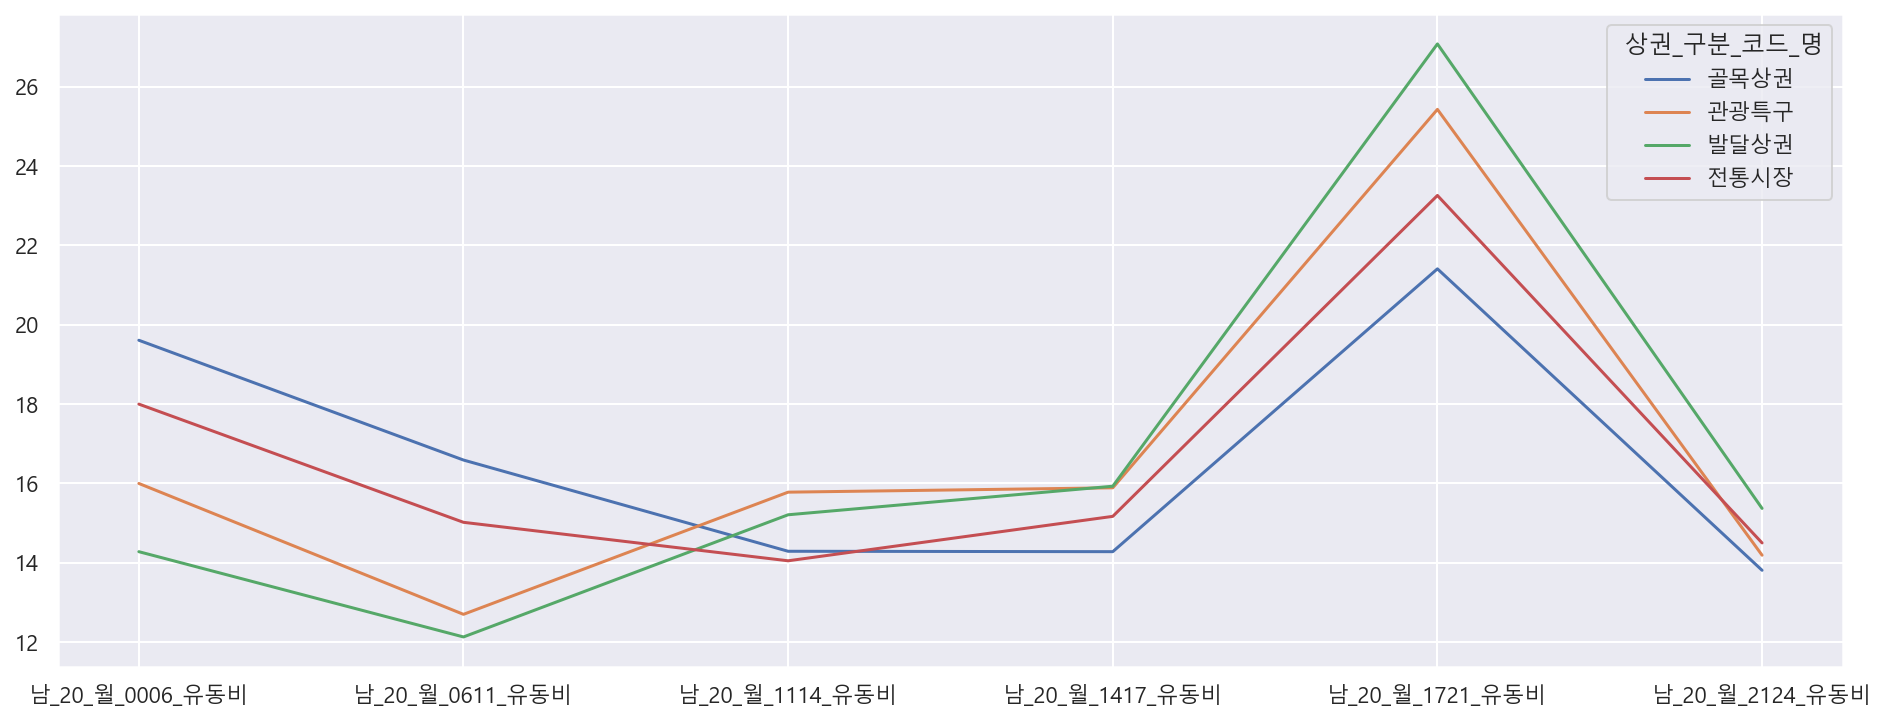

In [25]:
pivot4.plot(figsize=(16,6))
plt.show()

## c. 원본 데이터에서 골목시장 데이터만 분류

In [26]:
street = pop[pop[" 상권_구분_코드_명"] == "골목상권"]
street.reset_index(inplace=True)

In [27]:
street = pd.merge(street, reg, on="상권_코드")
street = pd.merge(street, code, left_on="시군구_코드", right_on="시군구코드")
street["구"] = [gu[:2] if len(gu)<=3 else gu[:3] for gu in street['시군구명']]

In [28]:
street["남_인구_비율"] = round(street["남성_유동인구_수"] / street["총_유동인구_수"] * 100, 2)
street["여_인구_비율"] = round(street["여성_유동인구_수"] / street["총_유동인구_수"] * 100, 2)

In [29]:
piv = pd.pivot_table(street, columns = "구", aggfunc = np.sum)

### 시간대별 10대 남성 인구 비율
- 용산 종로 중구의 0611, 1114 유동인구 비율이 높다.

In [30]:
piv.loc["남_10_금_인구수"] = piv.loc["남성연령대_10_금요일시간대_1_유동인구_수"] + piv.loc["남성연령대_10_금요일시간대_2_유동인구_수"] + piv.loc["남성연령대_10_금요일시간대_3_유동인구_수"] + piv.loc["남성연령대_10_금요일시간대_4_유동인구_수"] + piv.loc["남성연령대_10_금요일시간대_5_유동인구_수"] + piv.loc["남성연령대_10_금요일시간대_6_유동인구_수"]
piv.loc["남_10_금_0006_인구비율"] = round(piv.loc["남성연령대_10_금요일시간대_1_유동인구_수"] / piv.loc["남_10_금_인구수"] * 100, 2)
piv.loc["남_10_금_0611_인구비율"] = round(piv.loc["남성연령대_10_금요일시간대_2_유동인구_수"] / piv.loc["남_10_금_인구수"] * 100, 2)
piv.loc["남_10_금_1114_인구비율"] = round(piv.loc["남성연령대_10_금요일시간대_3_유동인구_수"] / piv.loc["남_10_금_인구수"] * 100, 2)
piv.loc["남_10_금_1417_인구비율"] = round(piv.loc["남성연령대_10_금요일시간대_4_유동인구_수"] / piv.loc["남_10_금_인구수"] * 100, 2)
piv.loc["남_10_금_1721_인구비율"] = round(piv.loc["남성연령대_10_금요일시간대_5_유동인구_수"] / piv.loc["남_10_금_인구수"] * 100, 2)
piv.loc["남_10_금_2124_인구비율"] = round(piv.loc["남성연령대_10_금요일시간대_6_유동인구_수"] / piv.loc["남_10_금_인구수"] * 100, 2)

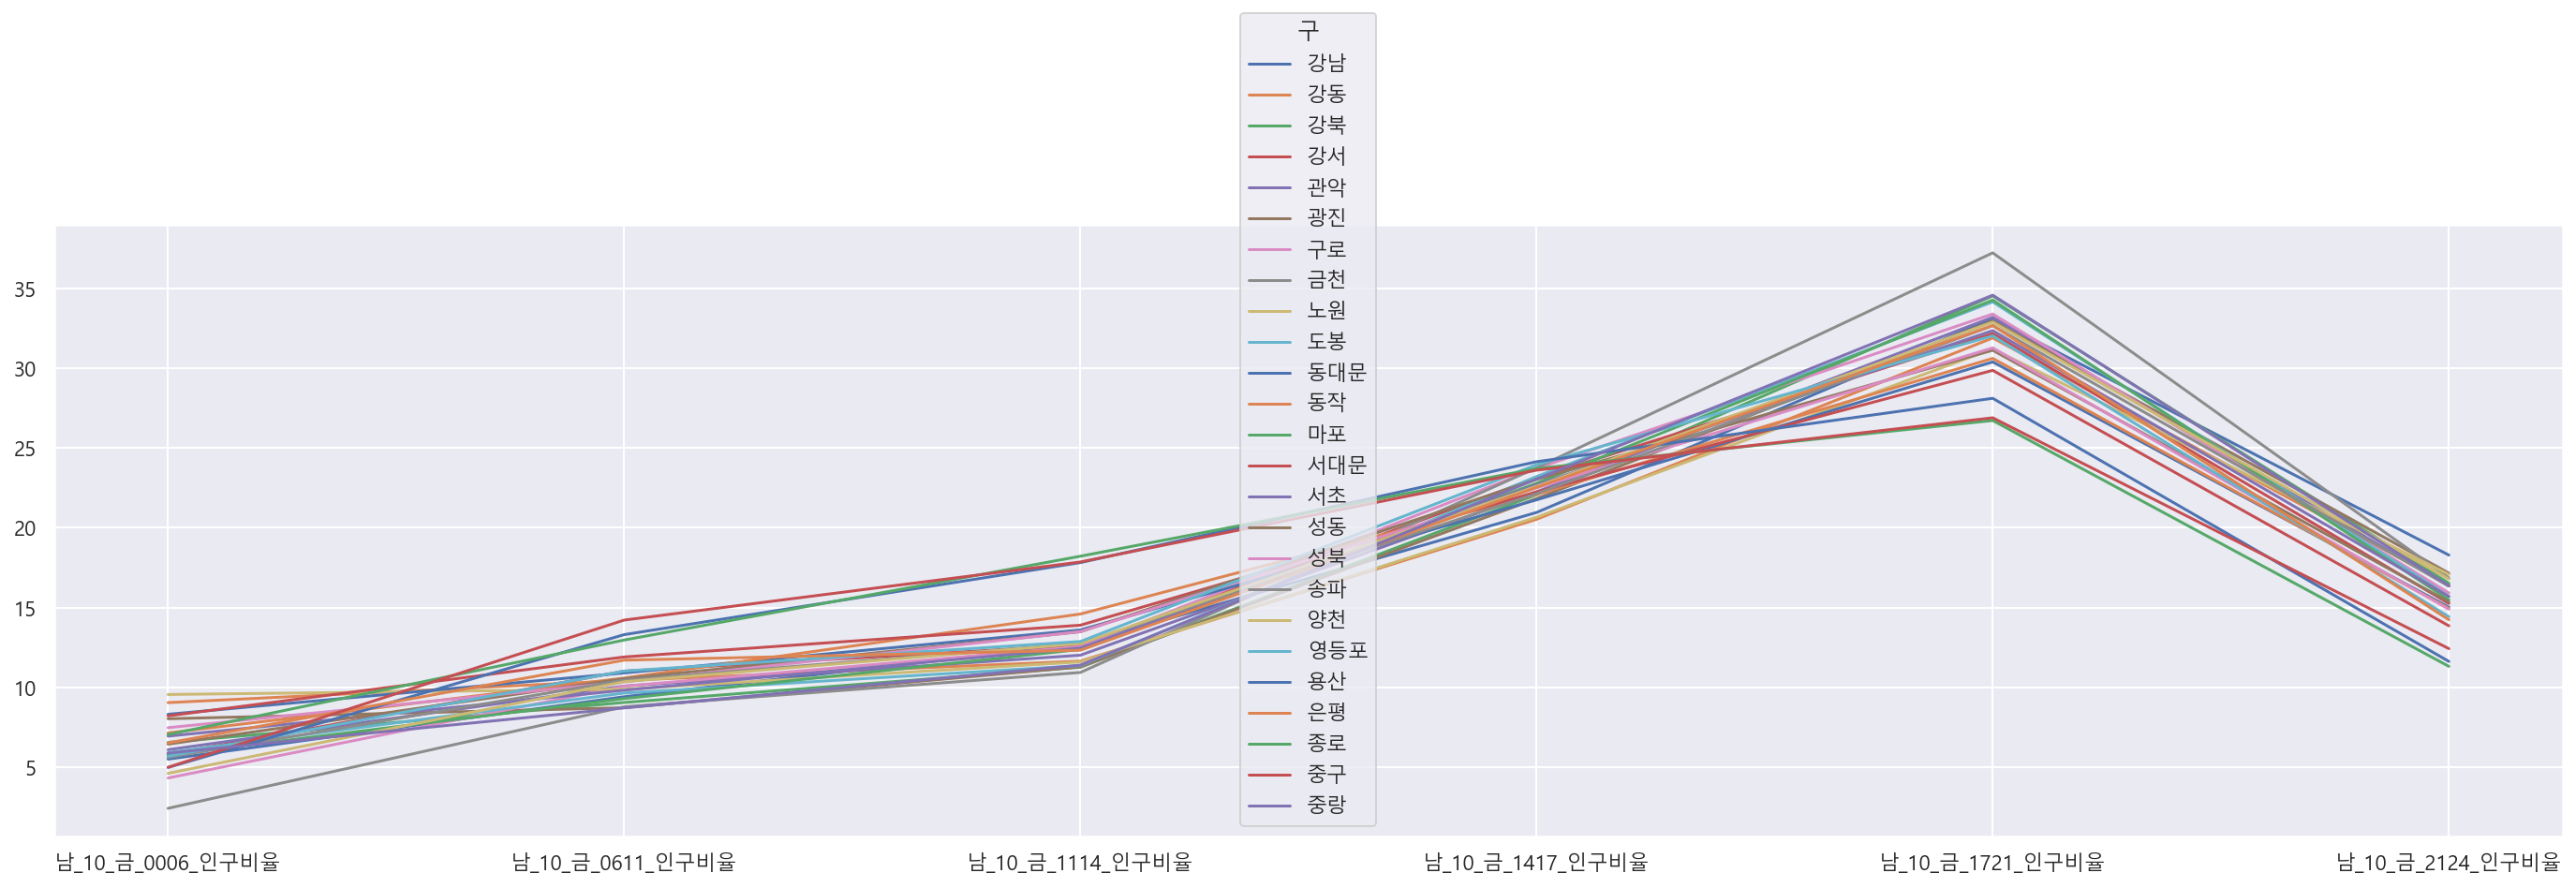

In [31]:
piv.loc[["남_10_금_0006_인구비율", "남_10_금_0611_인구비율", "남_10_금_1114_인구비율", "남_10_금_1417_인구비율", "남_10_금_1721_인구비율", "남_10_금_2124_인구비율"]].plot(figsize = (24,6));

### 시간대별 20대 남성 인구 비율
- 관악, 광진, 노원, 은평의 0006 비율이 상대적으로 높고 0611 비율이 낮음
- 강남, 구로, 서초, 성동, 양천, 영등포, 용산은 위와 반대 경향

In [32]:
piv.loc["남_20_금_인구수"] = piv.loc["남성연령대_20_금요일시간대_1_유동인구_수"] + piv.loc["남성연령대_20_금요일시간대_2_유동인구_수"] + piv.loc["남성연령대_20_금요일시간대_3_유동인구_수"] + piv.loc["남성연령대_20_금요일시간대_4_유동인구_수"] + piv.loc["남성연령대_20_금요일시간대_5_유동인구_수"] + piv.loc["남성연령대_20_금요일시간대_6_유동인구_수"]
piv.loc["남_20_금_0006_인구비율"] = round(piv.loc["남성연령대_20_금요일시간대_1_유동인구_수"] / piv.loc["남_20_금_인구수"] * 100, 2)
piv.loc["남_20_금_0611_인구비율"] = round(piv.loc["남성연령대_20_금요일시간대_2_유동인구_수"] / piv.loc["남_20_금_인구수"] * 100, 2)
piv.loc["남_20_금_1114_인구비율"] = round(piv.loc["남성연령대_20_금요일시간대_3_유동인구_수"] / piv.loc["남_20_금_인구수"] * 100, 2)
piv.loc["남_20_금_1417_인구비율"] = round(piv.loc["남성연령대_20_금요일시간대_4_유동인구_수"] / piv.loc["남_20_금_인구수"] * 100, 2)
piv.loc["남_20_금_1721_인구비율"] = round(piv.loc["남성연령대_20_금요일시간대_5_유동인구_수"] / piv.loc["남_20_금_인구수"] * 100, 2)
piv.loc["남_20_금_2124_인구비율"] = round(piv.loc["남성연령대_20_금요일시간대_6_유동인구_수"] / piv.loc["남_20_금_인구수"] * 100, 2)

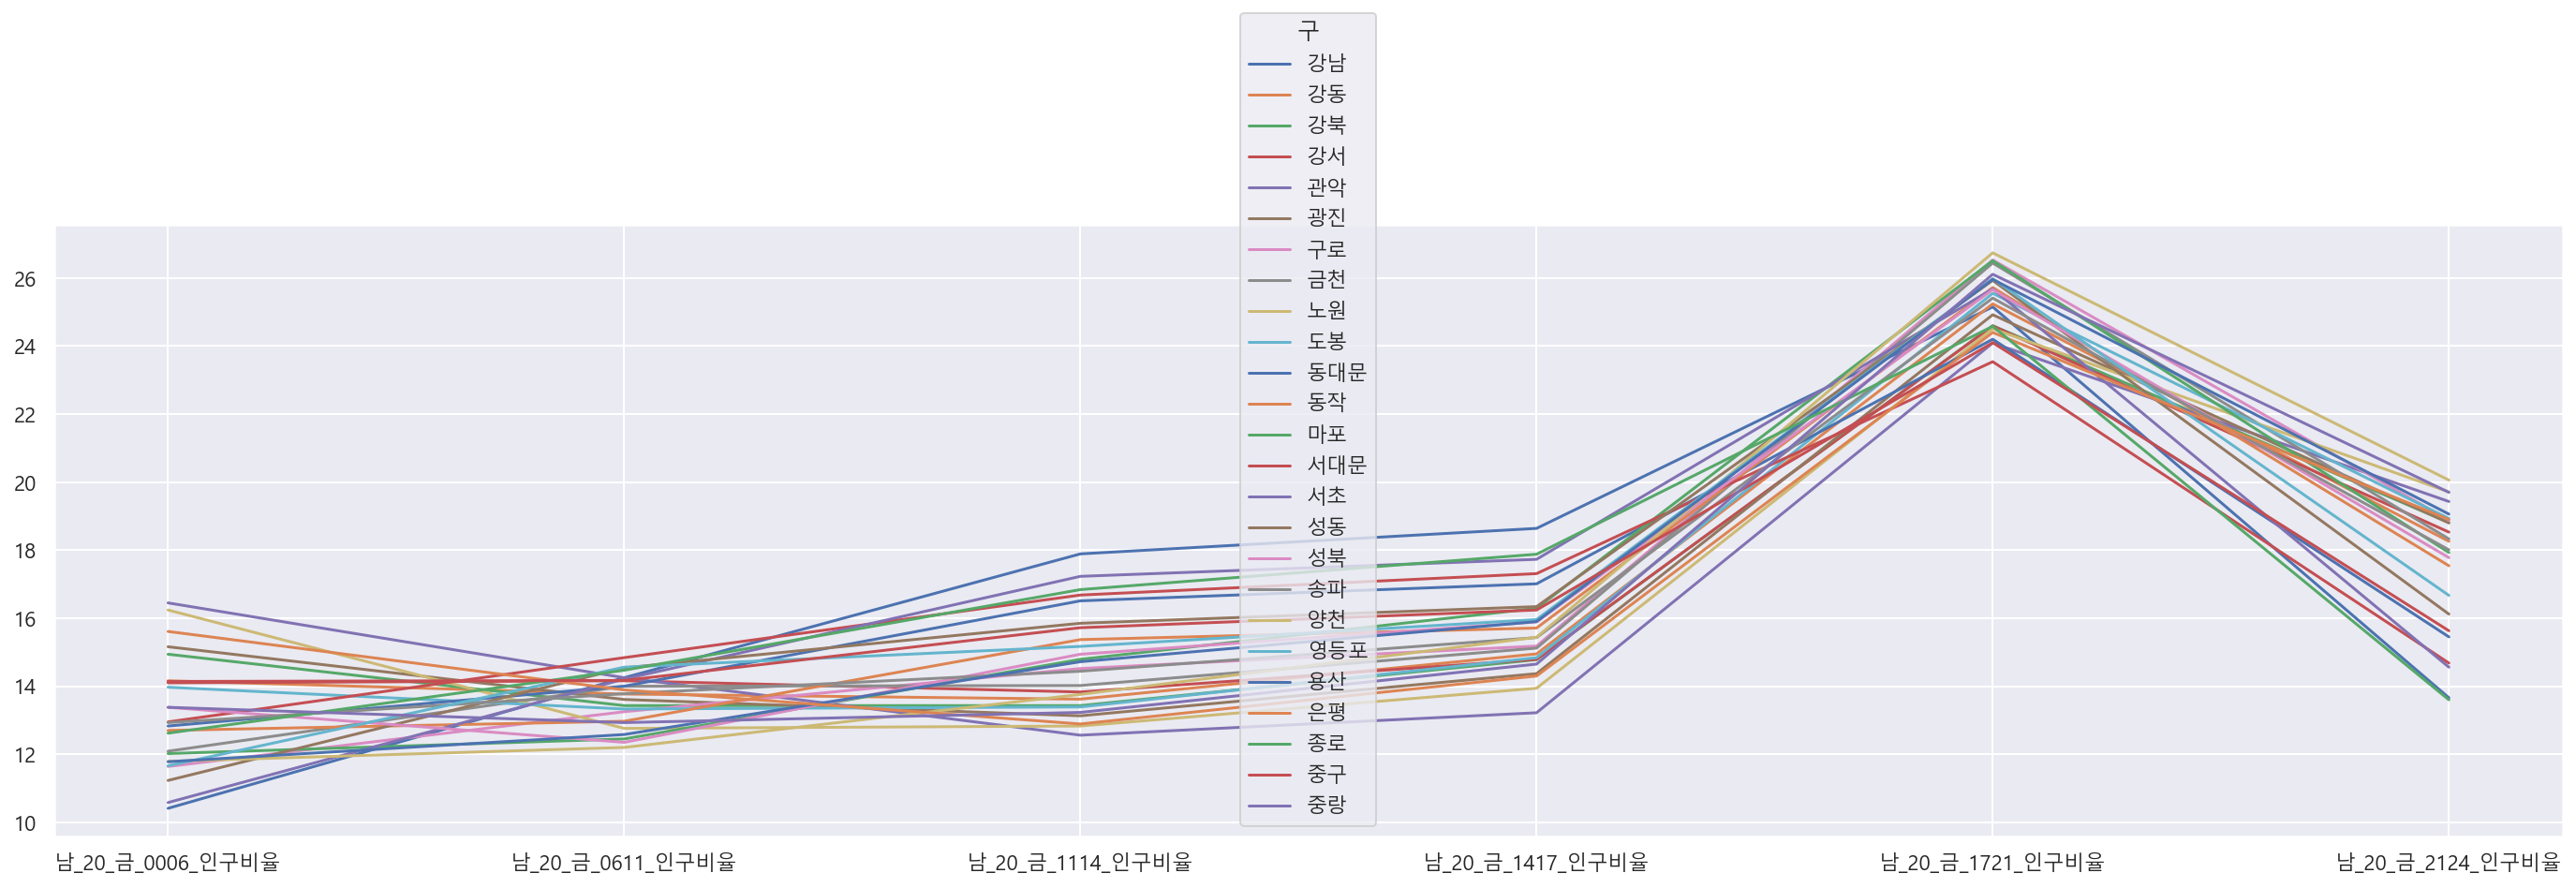

In [33]:
piv.loc[["남_20_금_0006_인구비율", "남_20_금_0611_인구비율", "남_20_금_1114_인구비율", "남_20_금_1417_인구비율", "남_20_금_1721_인구비율", "남_20_금_2124_인구비율"]].plot(figsize = (24,6));

### 시기별 유동 인구수 변화 추이
- 16년도 유동인구가 급격하게 하락한 원인은?

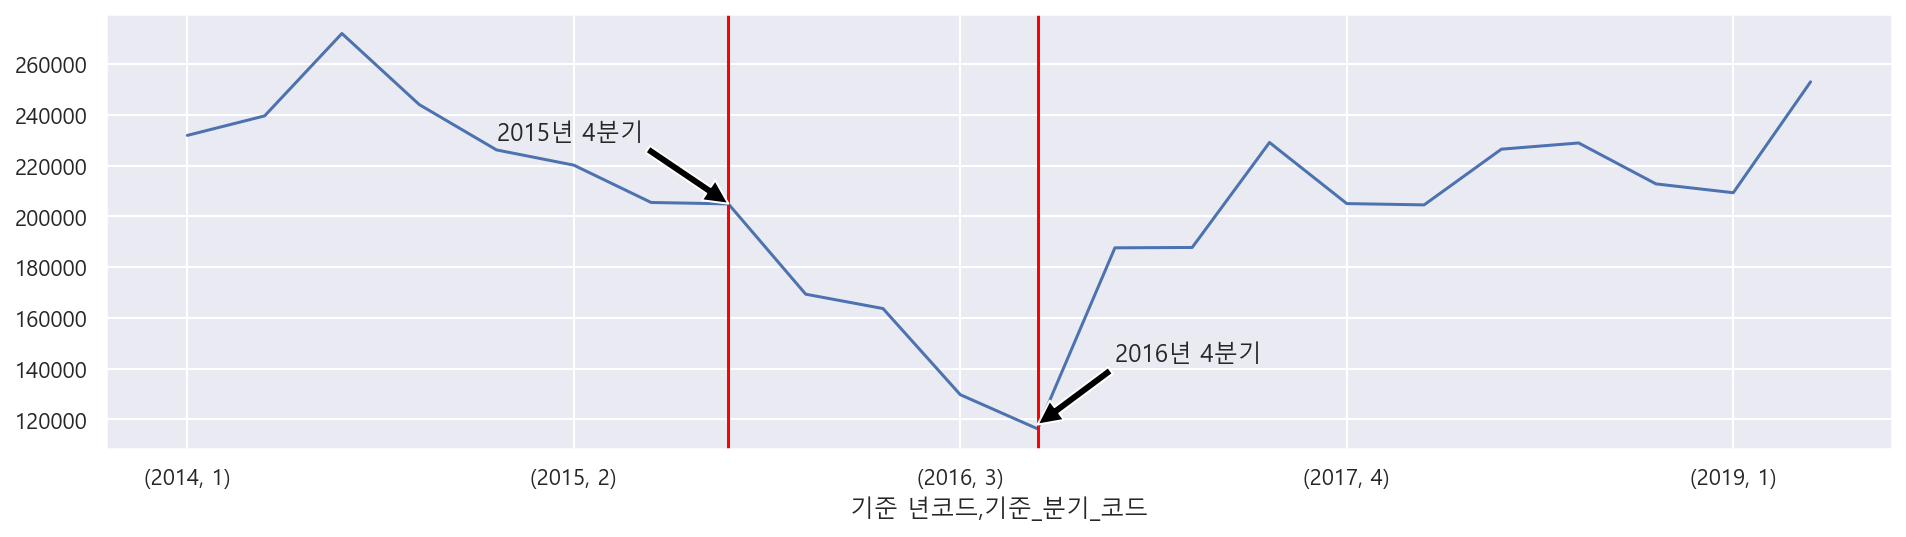

In [34]:
popul = pd.pivot_table(street, index=["기준 년코드","기준_분기_코드"])
popul["총_유동인구_수"].plot(figsize=(16,4))
plt.axvline(x=7,color='red')
plt.axvline(x=11, color='red')
plt.annotate("2015년 4분기", xy=(7, 205000), xytext=(4, 230000), arrowprops=dict(facecolor='black'))
plt.annotate("2016년 4분기", xy=(11, 118000), xytext=(12, 143000), arrowprops=dict(facecolor='black'))
plt.show()

In [35]:
money = pd.read_csv("서울시 우리마을가게 상권분석서비스(상권-추정매출)_2019.csv", encoding = 'euc-kr')
money_pv = money.groupby(money["상권_코드"]).sum()
street_pv = street.groupby(street["상권_코드"]).sum()
popmoney = pd.merge(street_pv, money_pv, left_index = True, right_index = True)

In [36]:
ybp_df= pd.read_csv('ybp_df.csv', encoding = 'utf-8')
ybp_df

,Unnamed: 0,년,총직장인구
0,0,2015,11659641
1,1,2016,11681121
2,2,2017,11741438
3,3,2018,11786120
4,4,2019,9959758


# 2. 매출액 데이터 분석

### 구별 매출 데이터 지도
- 강남 3구 + 성동구 상권의 매출이 눈에 띄게 높음

In [37]:
import folium 
import json
gu_dfp = pd.read_csv('gu_dfp.csv', encoding = 'utf-8')
gu_dfp.reset_index(drop=False,inplace=True)
geo_path = './03_skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

my_map = folium.Map(location=[37.5502,126.982], zoom_start=10.5)

folium.Choropleth(
    geo_data=geo_str,
    data= gu_dfp, columns=['구','당월매출'],
   # nan_fill_color='purple', nan_fill_opacity=0.4,
    key_on='feature.id', fill_color='YlOrRd',
    legend_name='당월_매출_금액',
).add_to(my_map)
my_map

In [39]:
df4 = pd.read_csv('./df4.csv')
df_5 = pd.read_csv('./df_5.csv')
df6 = pd.read_csv('./df6.csv')
df7 = pd.read_csv('./df7.csv')
df7_1 = pd.read_csv('./df7_1.csv')
df_8 = pd.read_csv('./df_8.csv')

### 구에 따른 점포수당 매출
- <중랑구, 강북구>보다  <강남구, 서초구>에서 약 1.5 배이상 높게 매출이 나타남

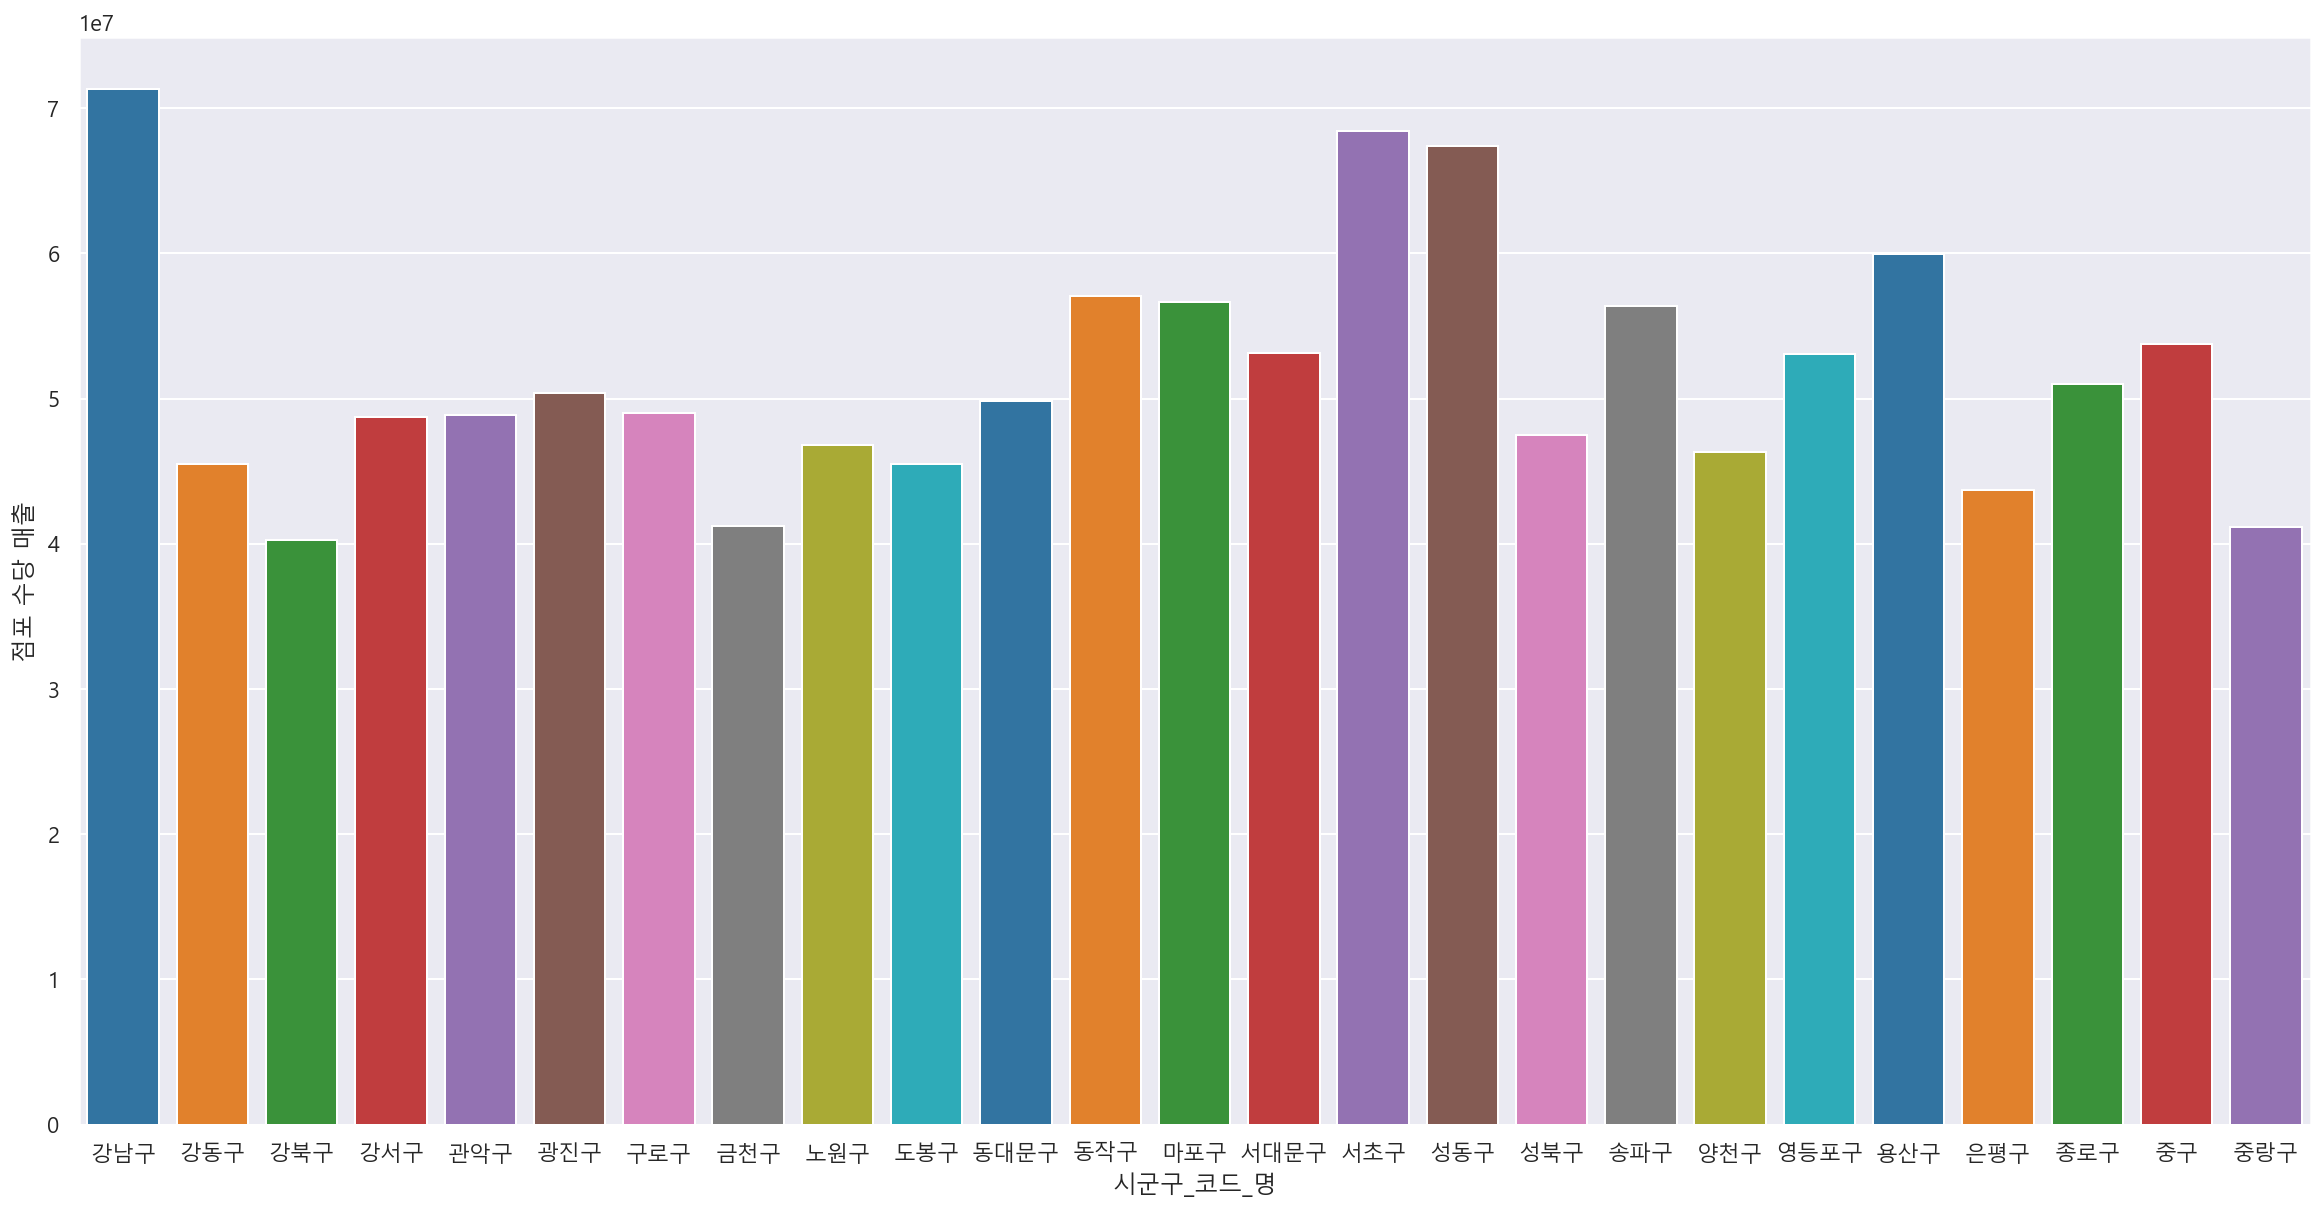

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='시군구_코드_명', y='점포 수당 매출', data = df_5, ci = None, palette="tab10")
plt.show()

### 구에 따른 총 직장 인구 수
- 매출이 높았던 <강남구, 서초구>가 직장인 수가 많았고, <강북구,중랑구>가 적은 직장인구수를 나타냄

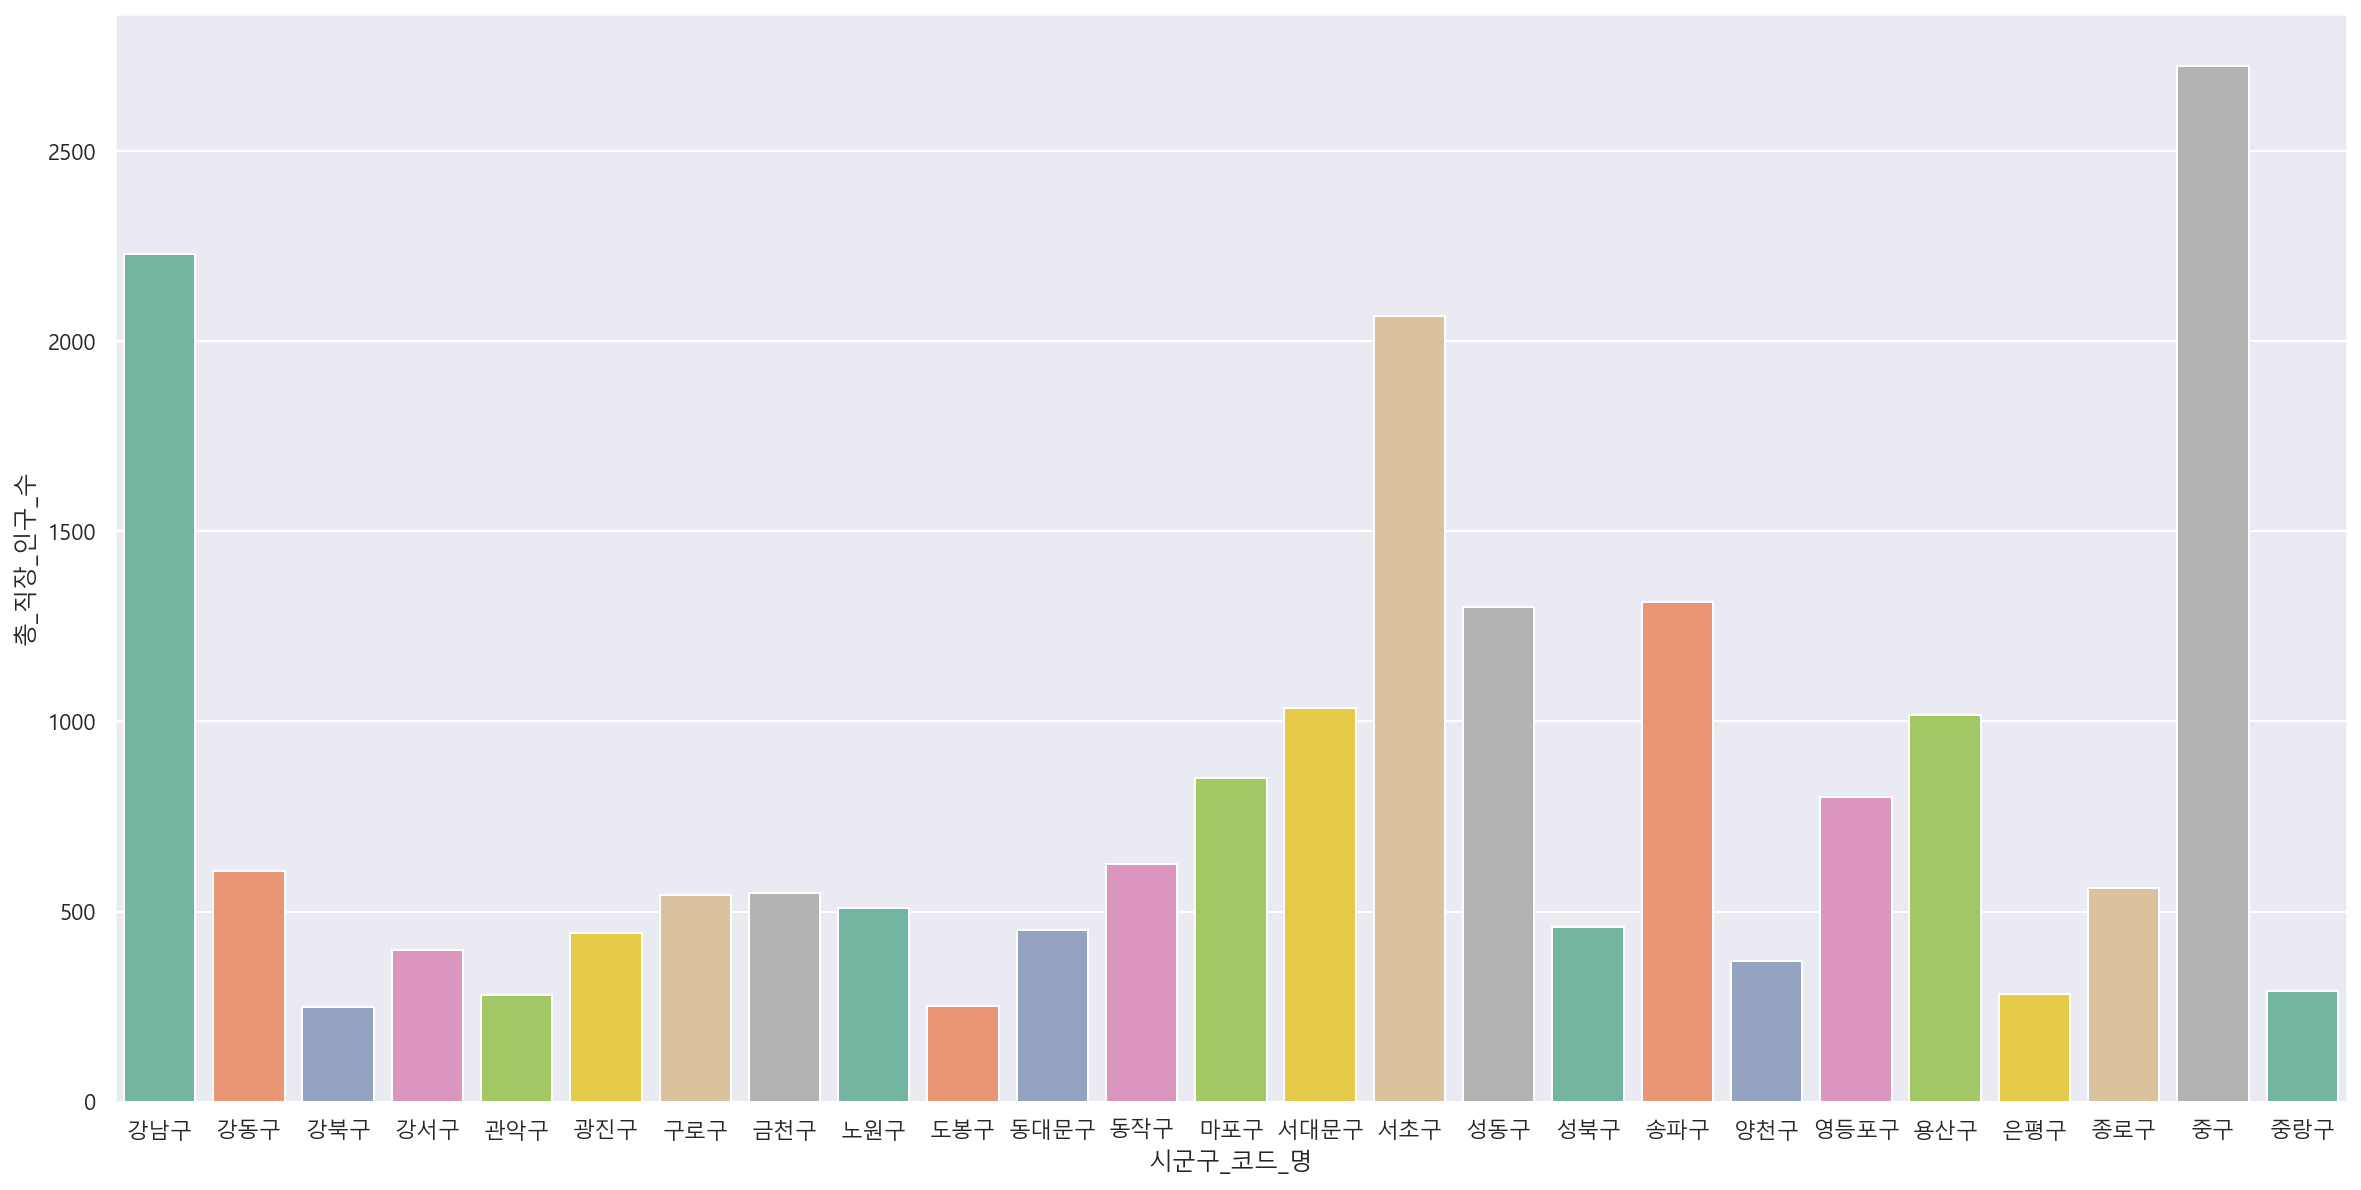

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='시군구_코드_명', y='총_직장_인구_수', data = df6, ci = None, palette="Set2")
plt.show()

### 직장인 수와 매출간의 상관관계 분석
- -0.18의 낮은 상관관계를 갖음

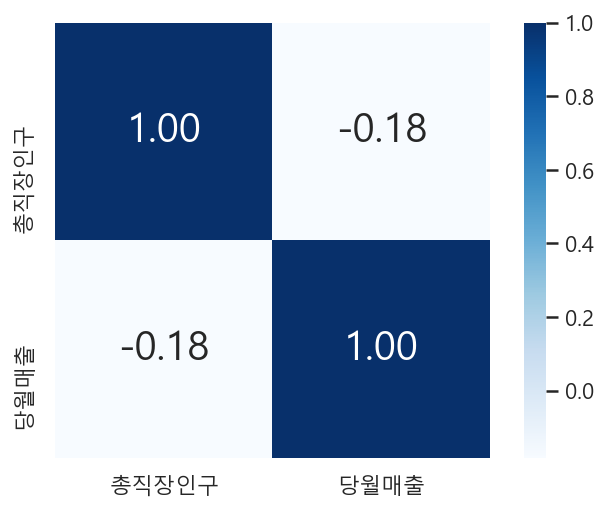

In [42]:
ybp_df= pd.read_csv('ybp_df.csv', encoding = 'utf-8')
ybp_df = ybp_df[['년','총직장인구']]
sales_df= pd.read_csv('sales_df.csv', encoding = 'utf-8')
sales_df = sales_df[['년','당월매출']]
result = pd.merge(ybp_df,sales_df, on='년')
corr = result[["총직장인구","당월매출"]].corr(method = 'pearson')
ys_hmp = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')

### 구에 따른 총 상주인구 수(평균)
- <강남구, 서초구>가 <강북구, 중랑구>보다 총 상주인구 수가 적음

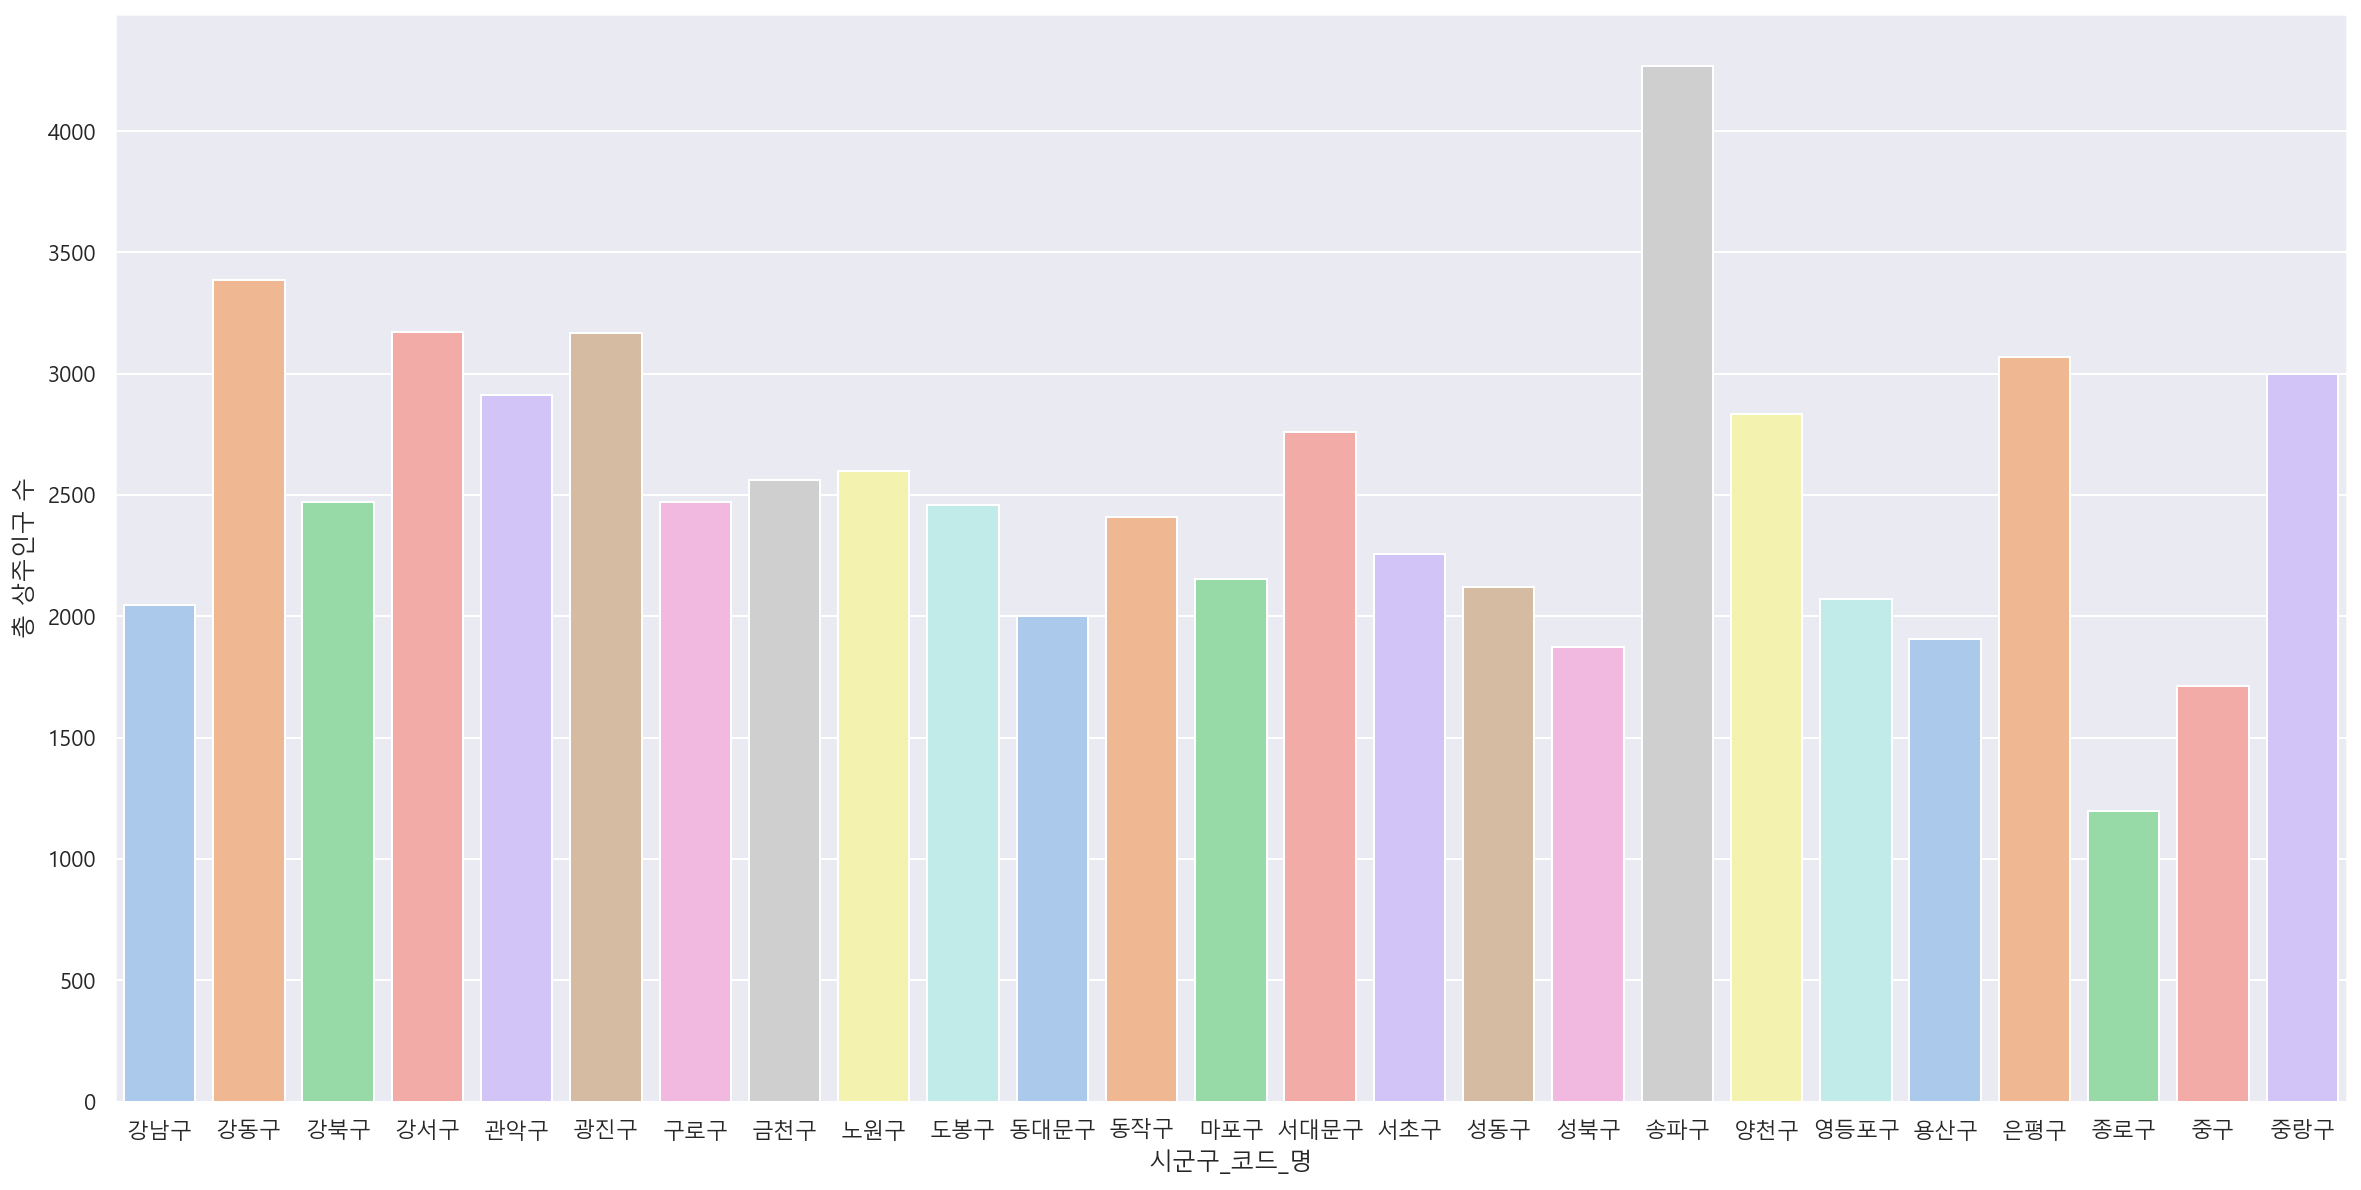

In [43]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='시군구_코드_명', y='총 상주인구 수', data = df7_1, ci = None, palette="pastel")
plt.show()

### 매출 상위 두개 구의 업종별 매출

### 강남구
- 주유소가 점포수당 매출이 제일 높음

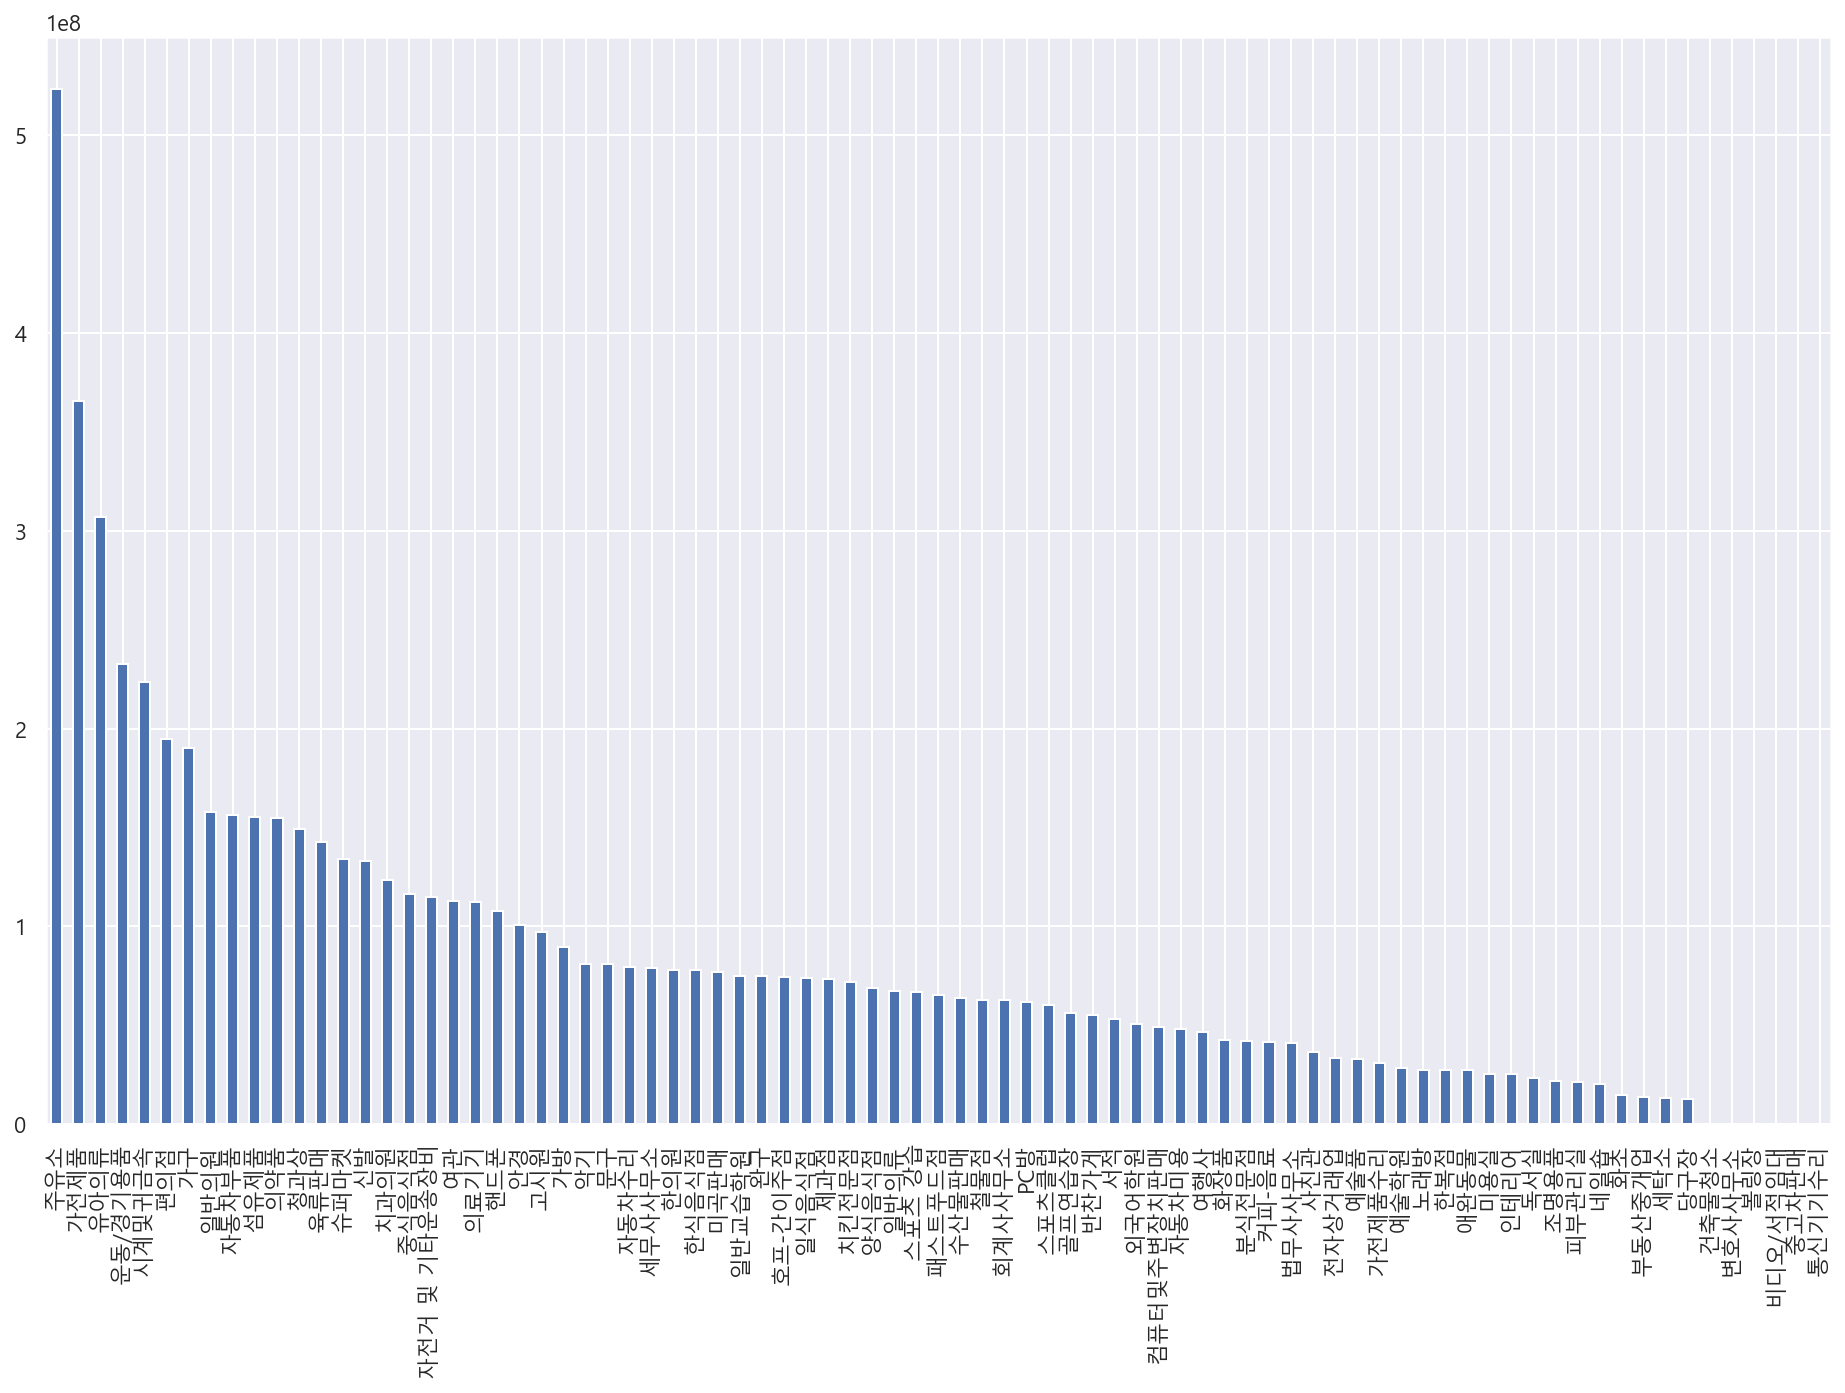

In [44]:
df_8.set_index('시군구_코드_명', inplace=True)
df_8.loc['강남구'].sort_values(ascending=False).plot(kind='bar', figsize=(16, 10))

### 서초구
- 주유소가 점포 수당 매출이 제일 높음

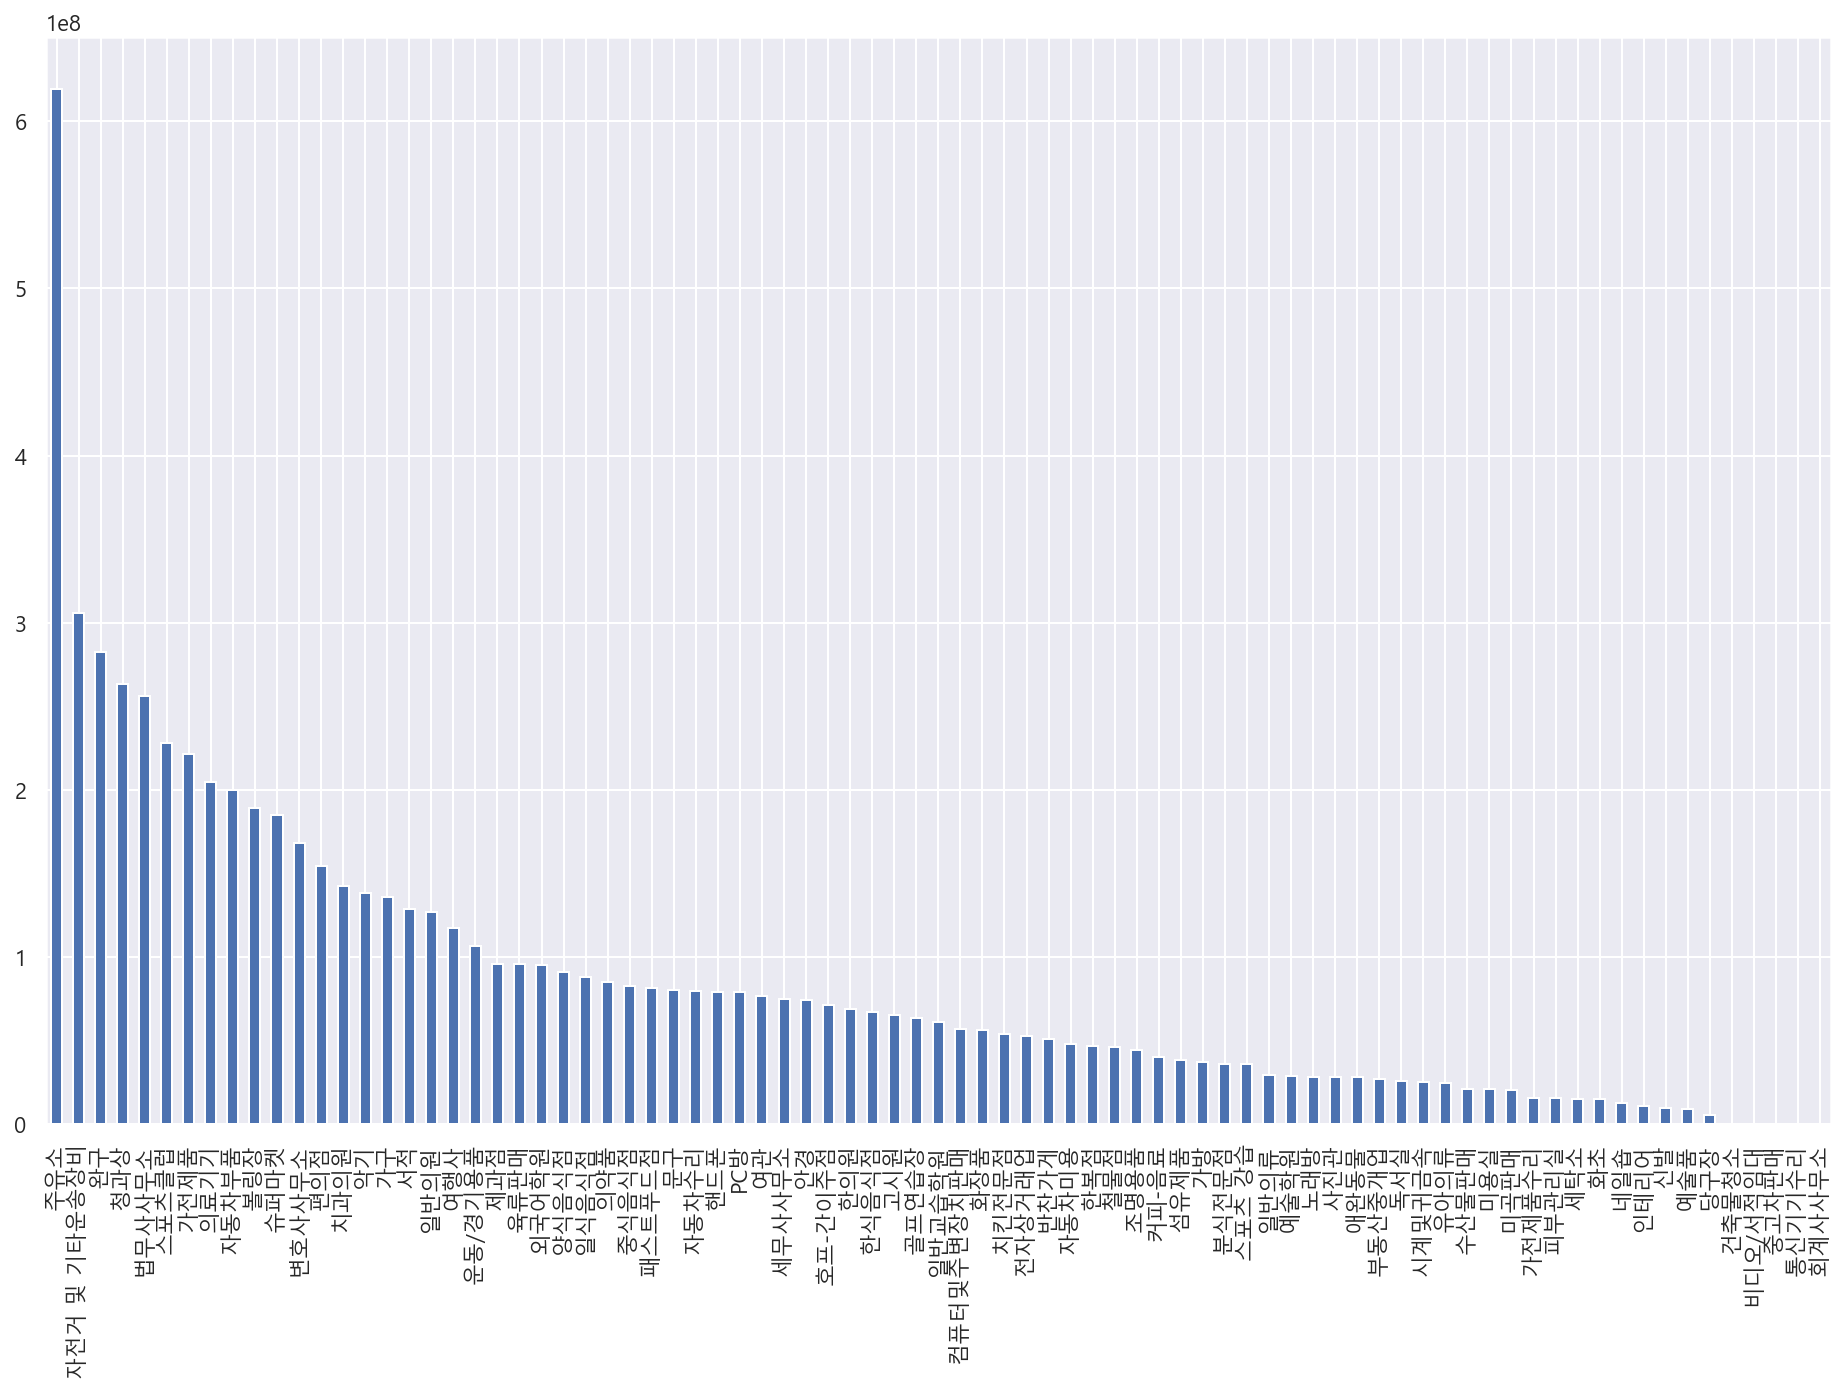

In [45]:
df_8.loc['서초구'].sort_values(ascending=False).plot(kind='bar', figsize=(16, 10));

### 매출 하위 두개 구

### 강북구

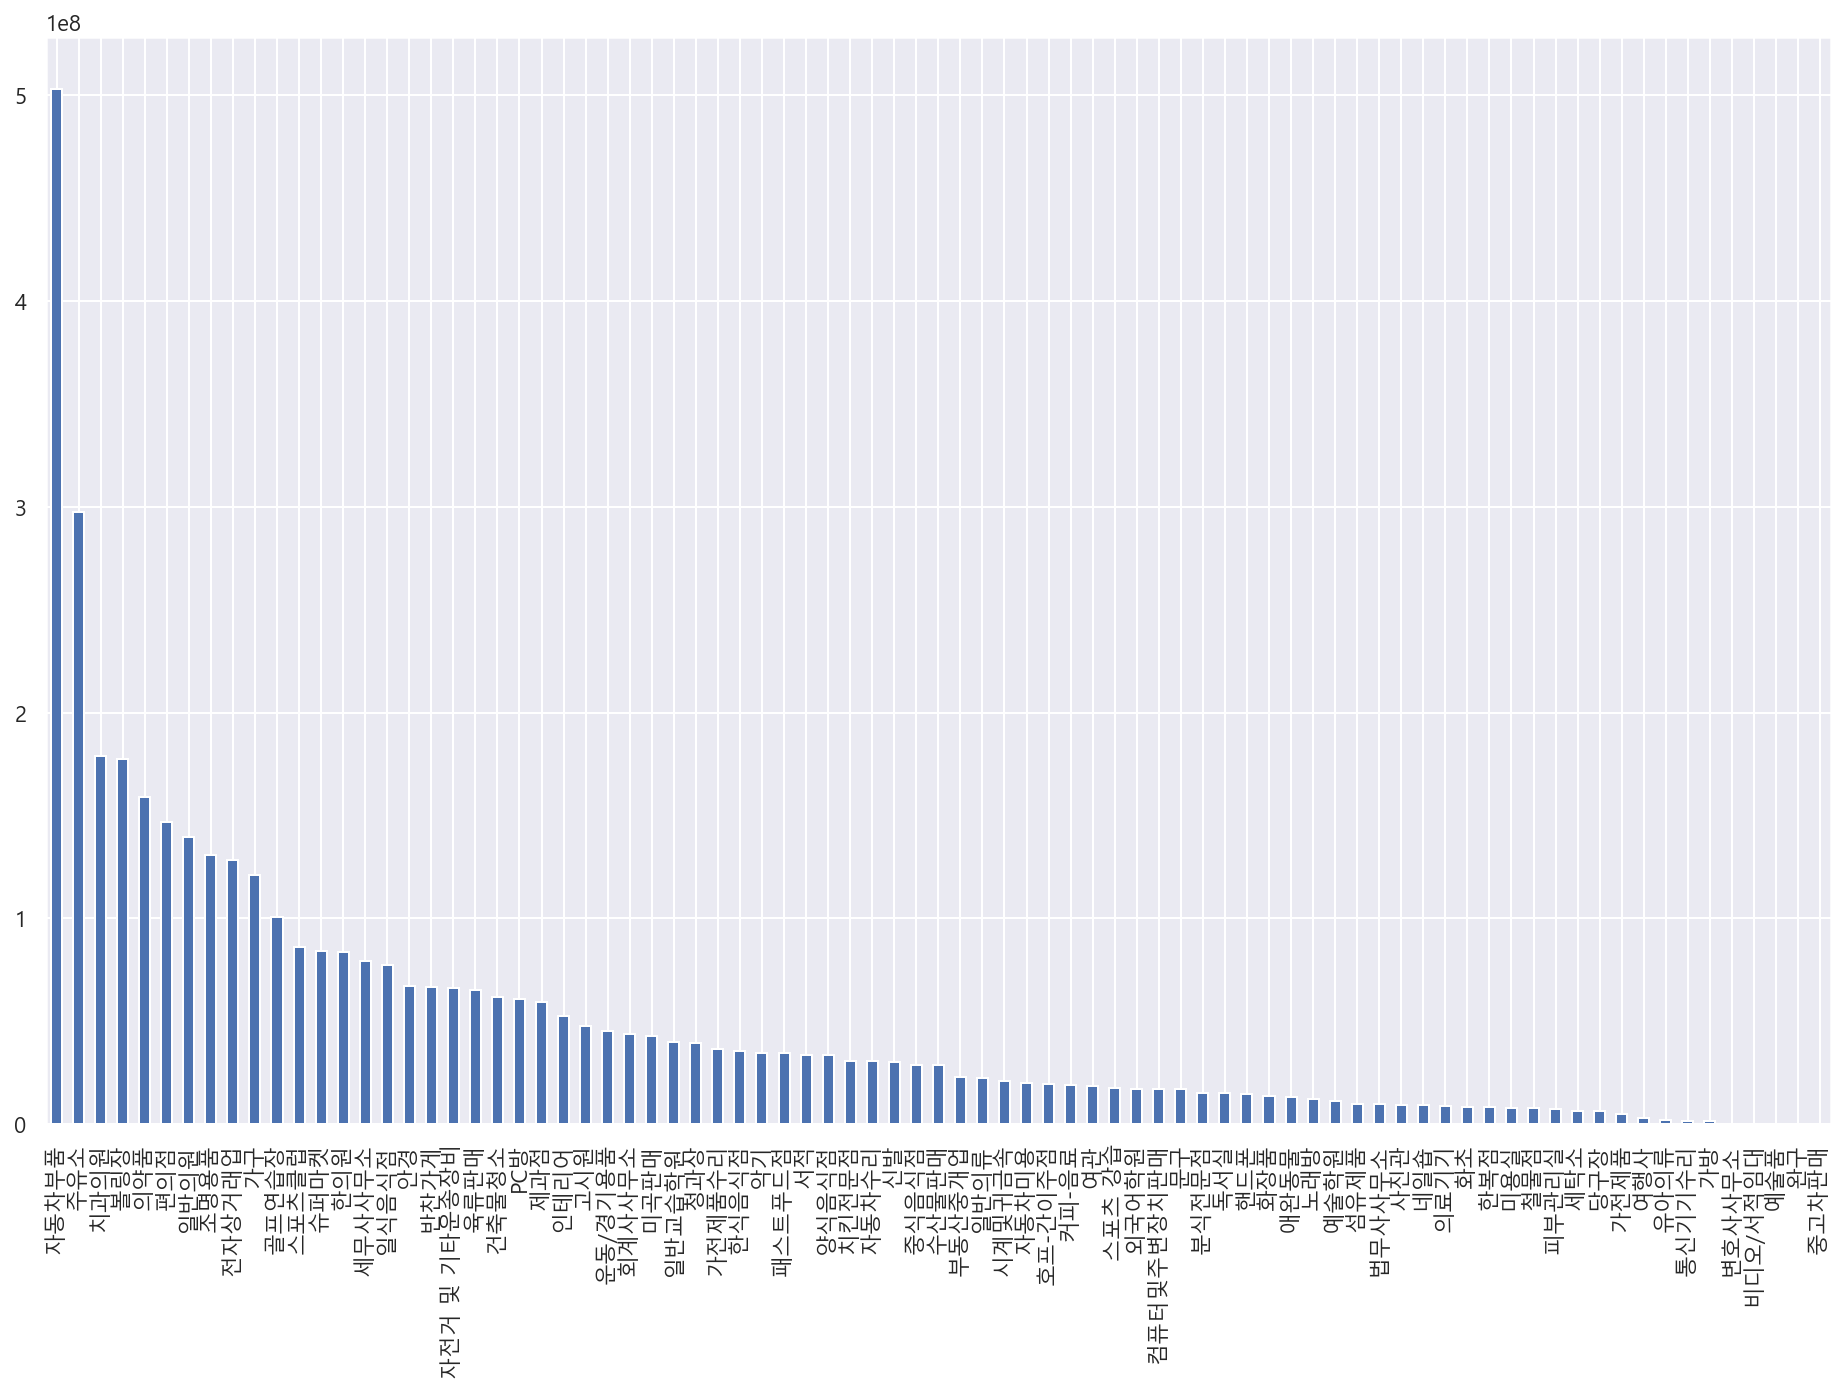

In [46]:
df_8.loc['강북구'].sort_values(ascending=False).plot(kind='bar', figsize=(16, 10));

### 중랑구

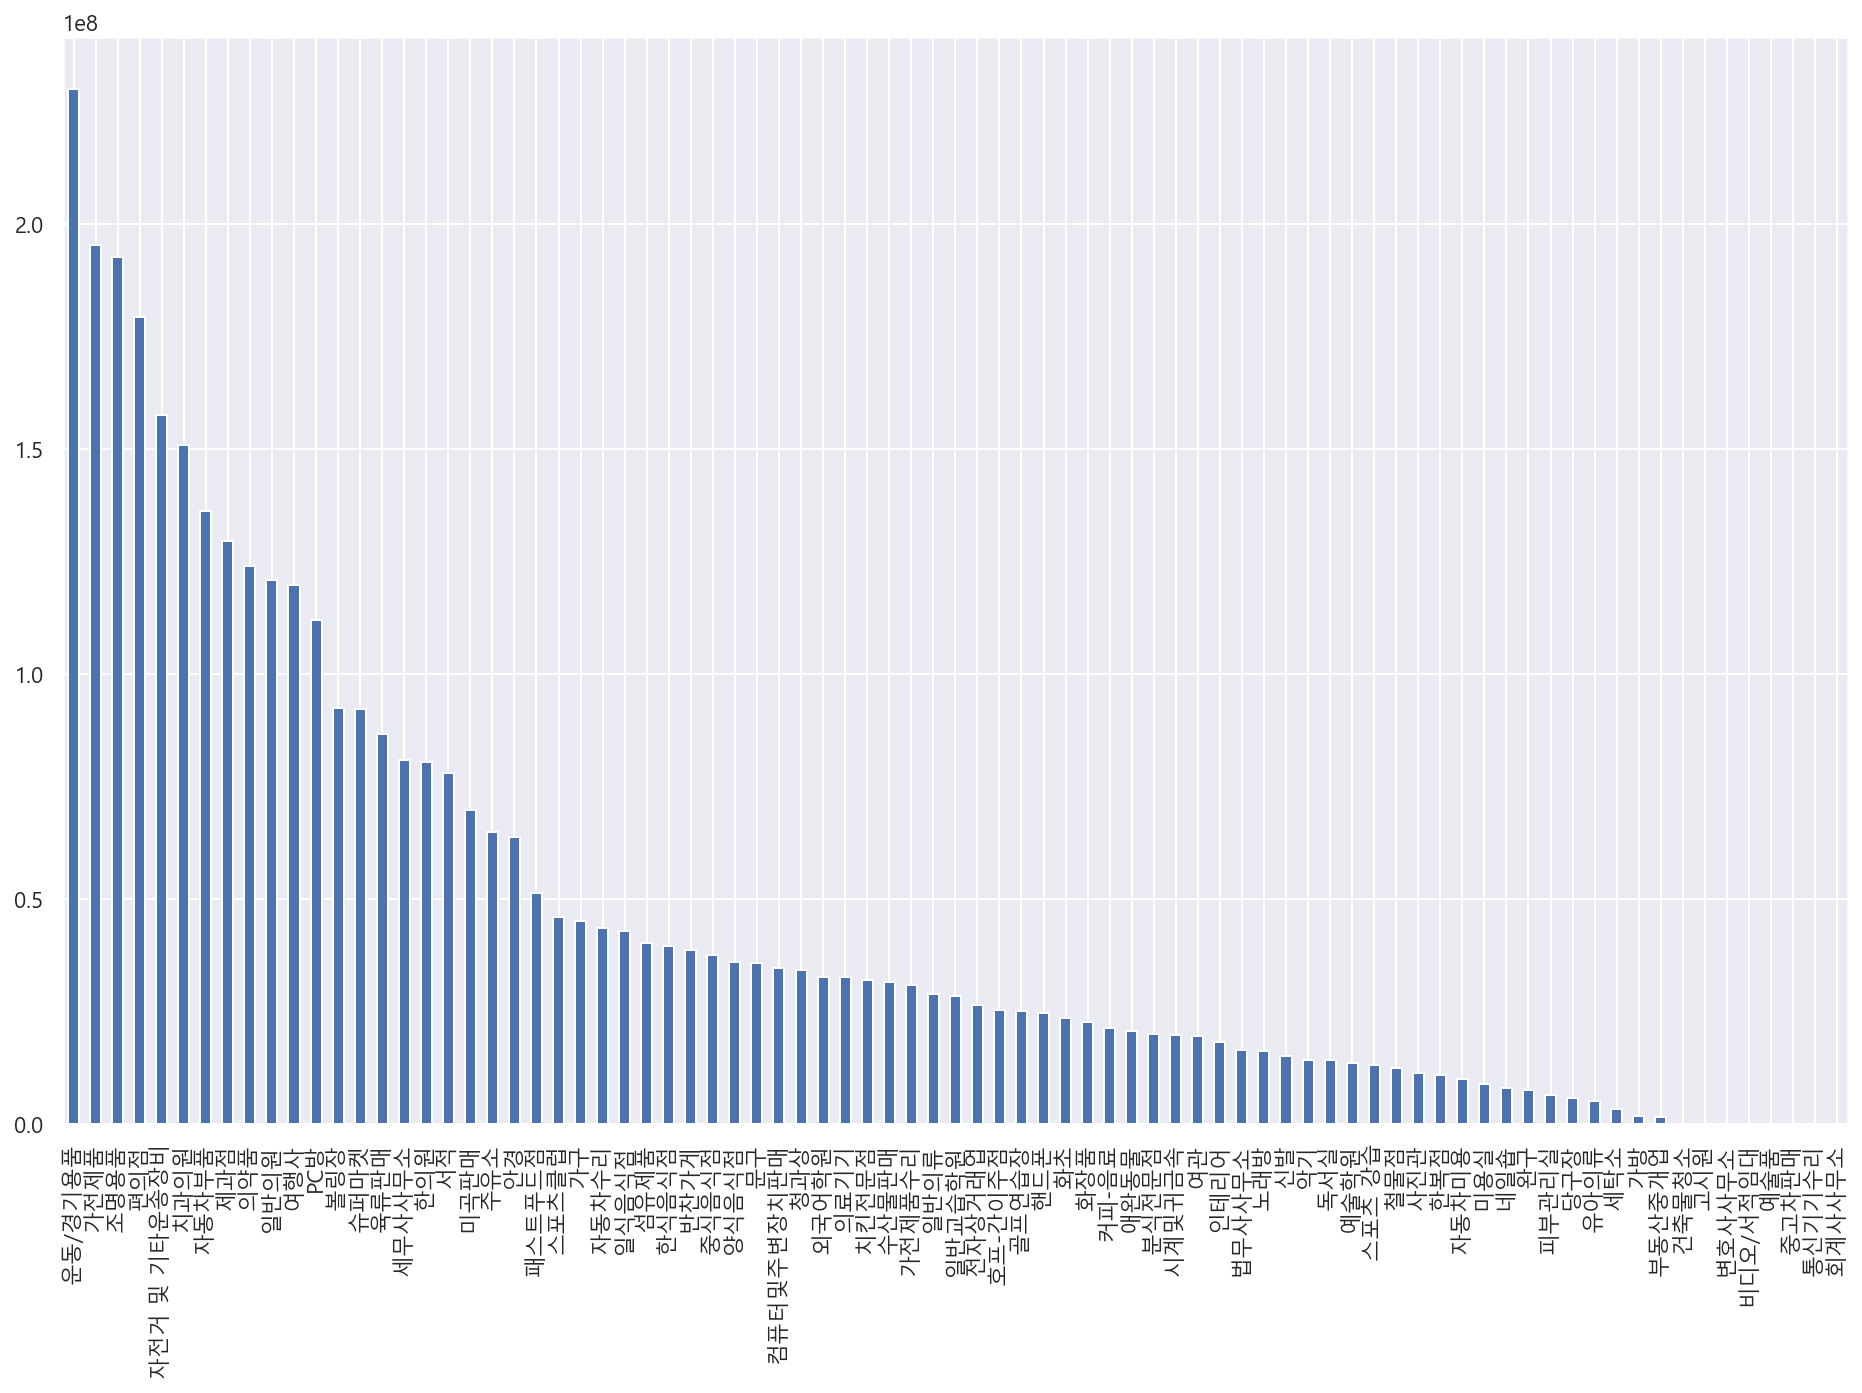

In [47]:
df_8.loc['중랑구'].sort_values(ascending=False).plot(kind='bar', figsize=(16, 10));

### 연령별 점포 수당 매출 금액(평균)
- 10대와 60대 이상의 매출금액이 낮게 나타남

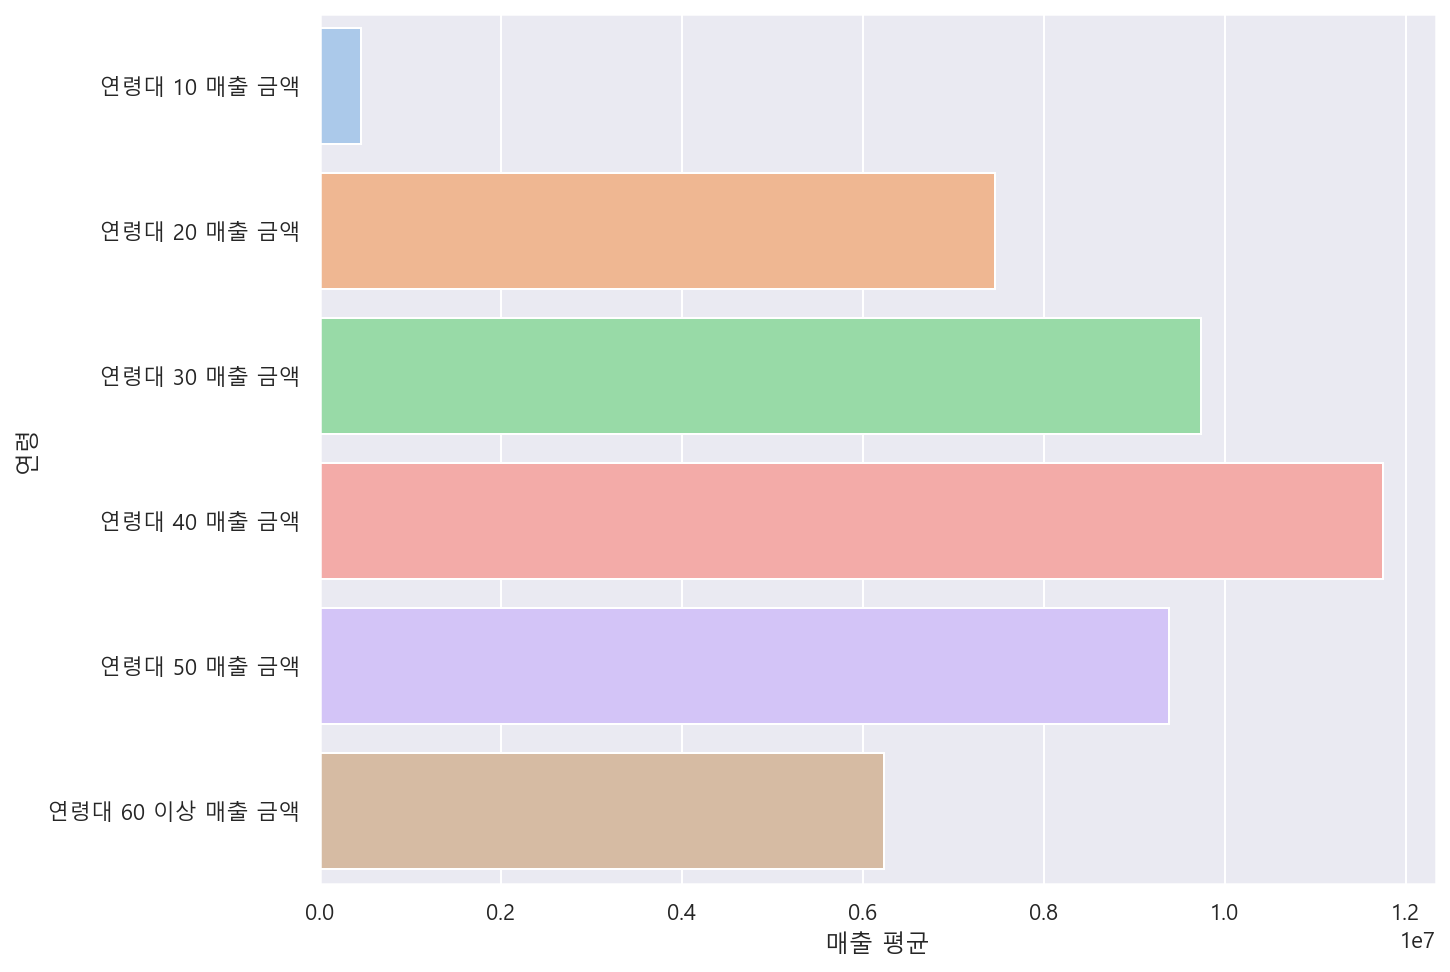

In [48]:
plt.figure(figsize=(10,8))
sns.barplot(x='매출 평균', y='연령', data=df4, palette='pastel')
plt.show()

### 연령대별 상권 상주인구 수(평균)
- 매출 금액이 낮게 나타나던 10대는 인구 수도 적은데 비해, 60대 이상은 다른 연령대보다 낮은 매출 금액을 나타내지만 인구 수는 다른 연령대보다 전반적으로 높게 나타남

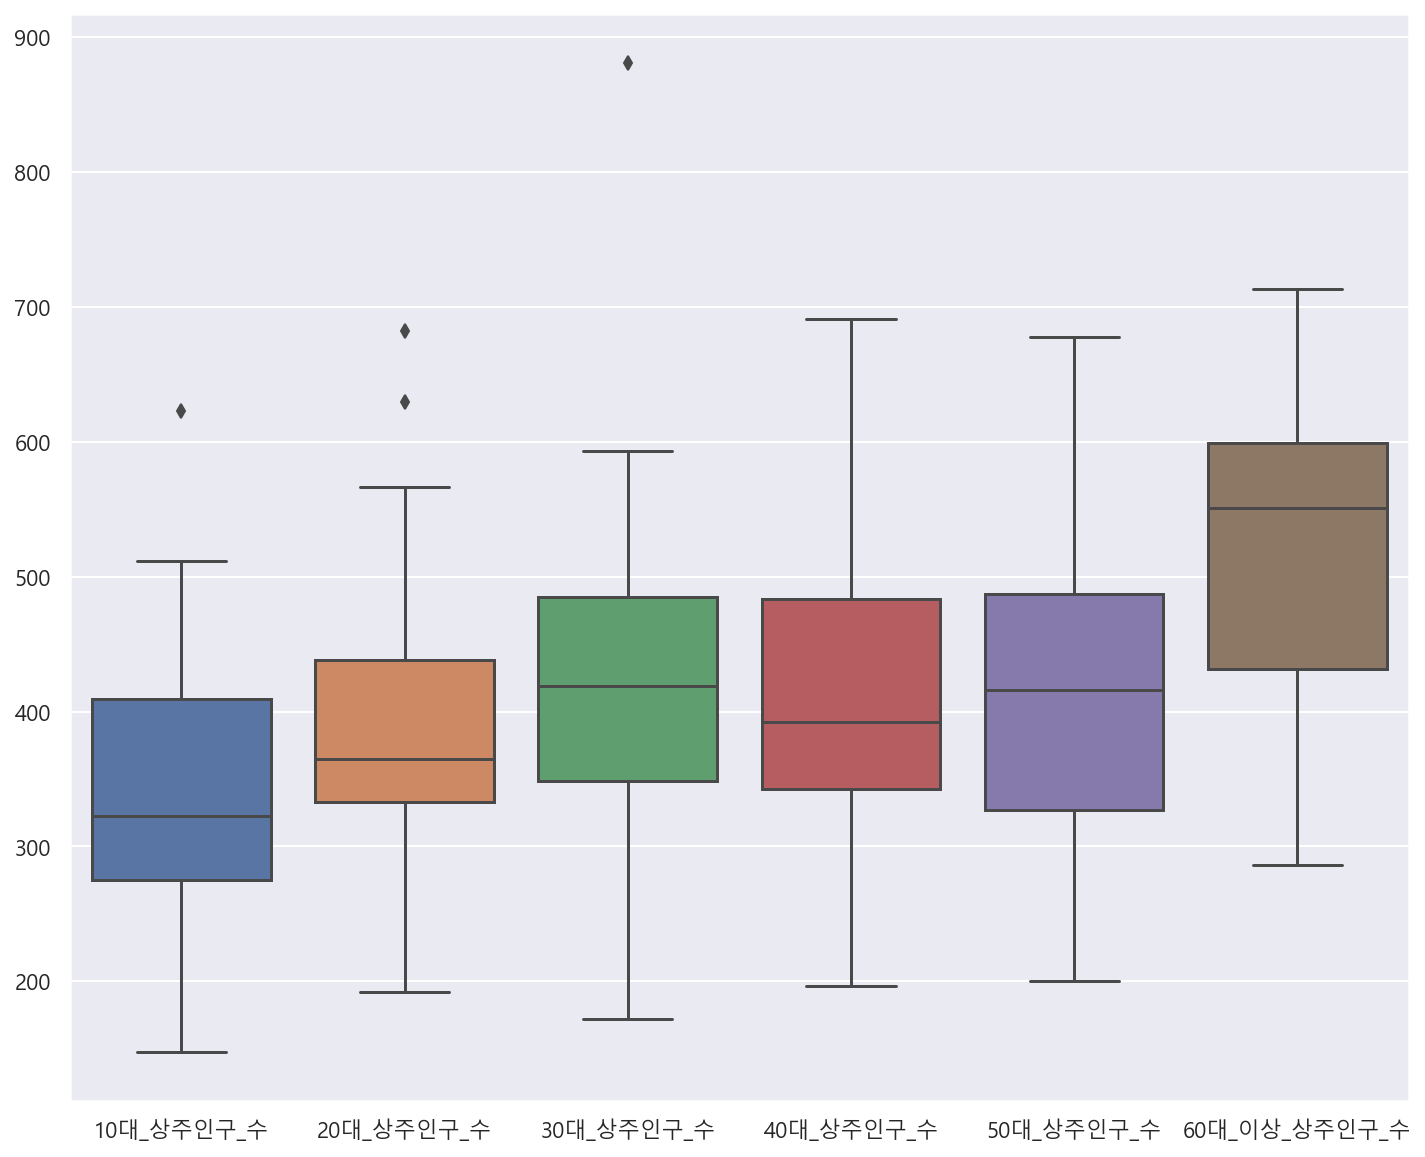

In [49]:
df7.columns = ['시군구_코드_명','10대_상주인구_수','20대_상주인구_수','30대_상주인구_수','40대_상주인구_수','50대_상주인구_수','60대_이상_상주인구_수']
plt.figure(figsize=(12,10))
sns.boxplot(data=df7)
plt.show()

# 3. 유동인구 & 매출액 데이터 결합 분석

### 유동인구 & 매출액 상관관계
- 유동인구와 매출액의 상관 관계가 낮아보임

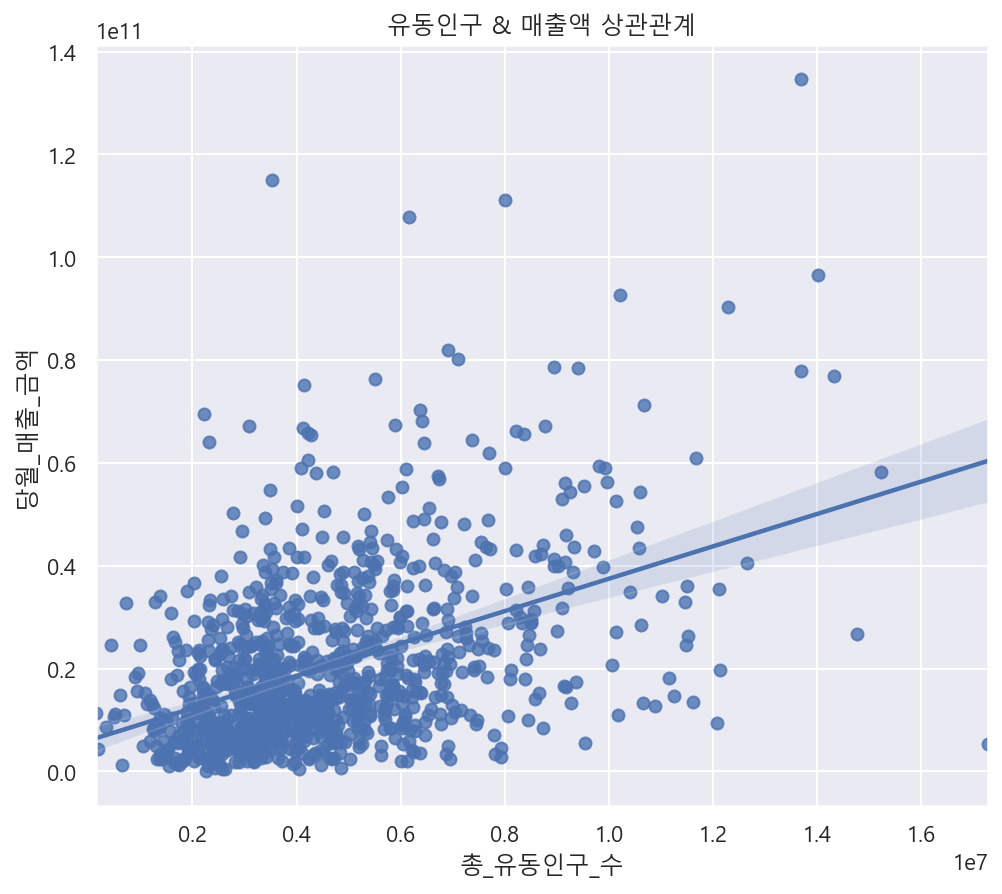

In [50]:
fig, ax = plt.subplots(figsize=(8, 7))
sns.regplot(x="총_유동인구_수", y="당월_매출_금액", data=popmoney)
plt.title("유동인구 & 매출액 상관관계")
plt.show()

### 연령대별 유동인구 1인당 매출액
- 10대가 가장 낮고 연령대 상승에 따라 매출액 동반 상승(50대 제외)
- 10대는 유동 인구 대비 소비를 많이 안 한다.

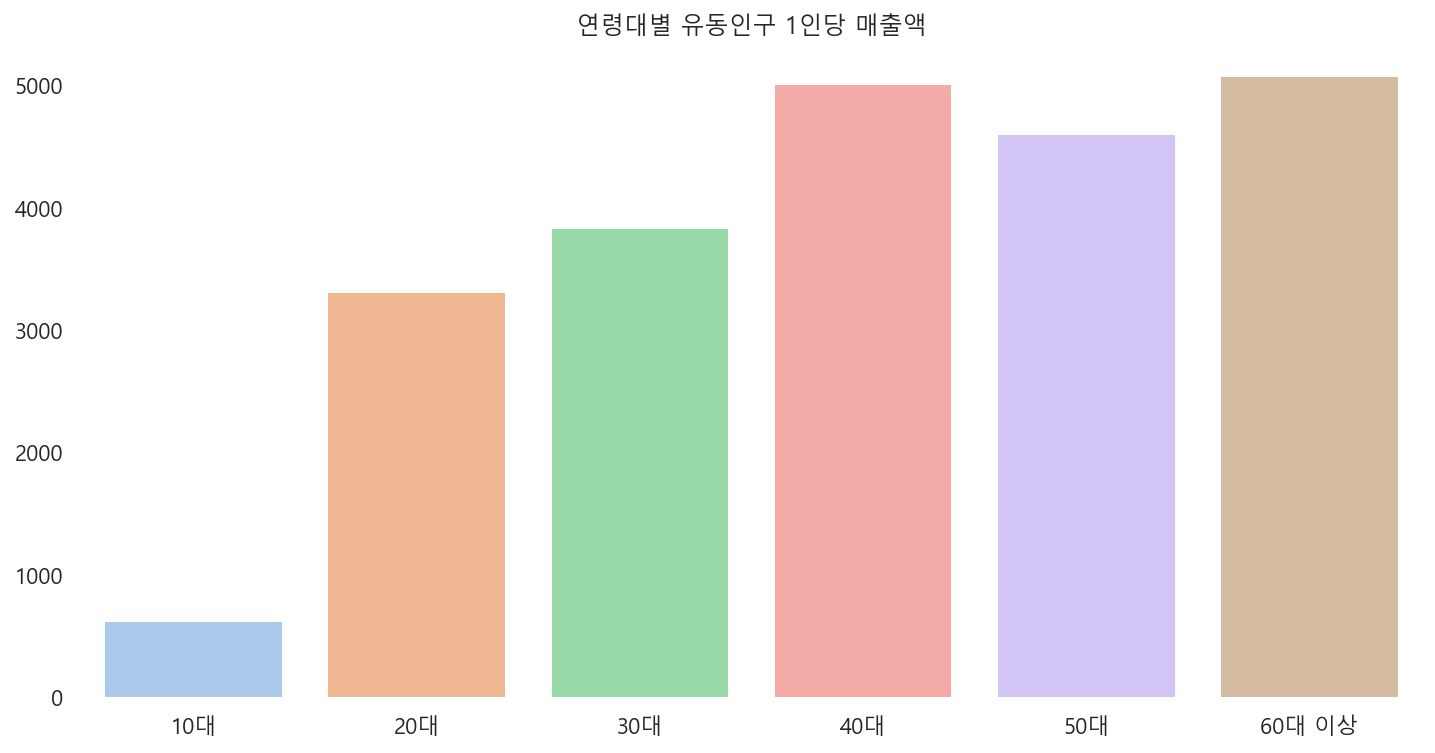

In [59]:
data = pd.DataFrame(columns=["10대", "20대", "30대", "40대", "50대", "60대 이상"])
data.loc[0] = [popmoney["연령대_10_매출_금액"].sum()/popmoney["연령대_10_유동인구_수"].sum(),
      popmoney["연령대_20_매출_금액"].sum()/popmoney["연령대_20_유동인구_수"].sum(),
      popmoney["연령대_30_매출_금액"].sum()/popmoney["연령대_30_유동인구_수"].sum(),
      popmoney["연령대_40_매출_금액"].sum()/popmoney["연령대_40_유동인구_수"].sum(),
      popmoney["연령대_50_매출_금액"].sum()/popmoney["연령대_50_유동인구_수"].sum(),
popmoney["연령대_60_이상_매출_금액"].sum()/popmoney["연령대_60_이상_유동인구_수"].sum()]

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data = data, ci = None, palette="pastel")
plt.title("연령대별 유동인구 1인당 매출액")
ax.set_facecolor('w')
plt.show()

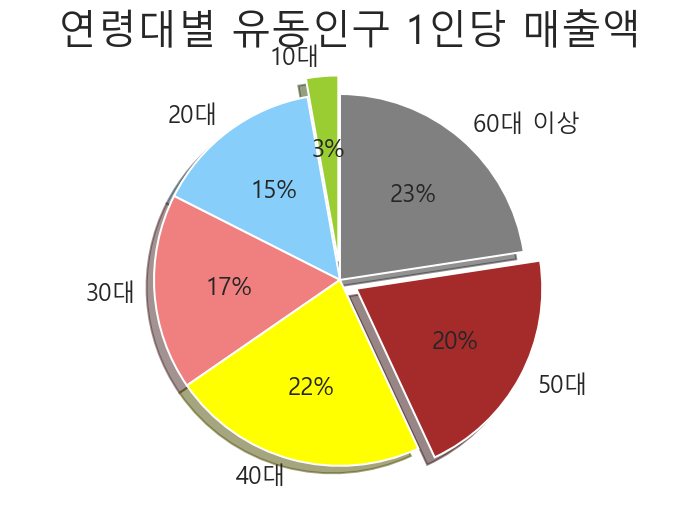

In [52]:
labels = ["10대", "20대", "30대", "40대", "50대", "60대 이상"]
sizes = [data for data in data.loc[0]]
colors = ['yellowgreen', 'lightskyblue', 'lightcoral', 'yellow', 'brown', 'grey']
explodes = (0.1, 0, 0, 0, 0.1, 0)
plt.pie(sizes, explode=explodes, labels=labels, colors=colors, autopct='%1.0f%%', shadow=True, startangle=90, textprops={'fontsize': 12})
plt.axis('equal')
plt.title("연령대별 유동인구 1인당 매출액", fontsize=20)
plt.show()

### 유동인구 성별 대비 매출액
- 남성이 여성보다 조금 더 높음

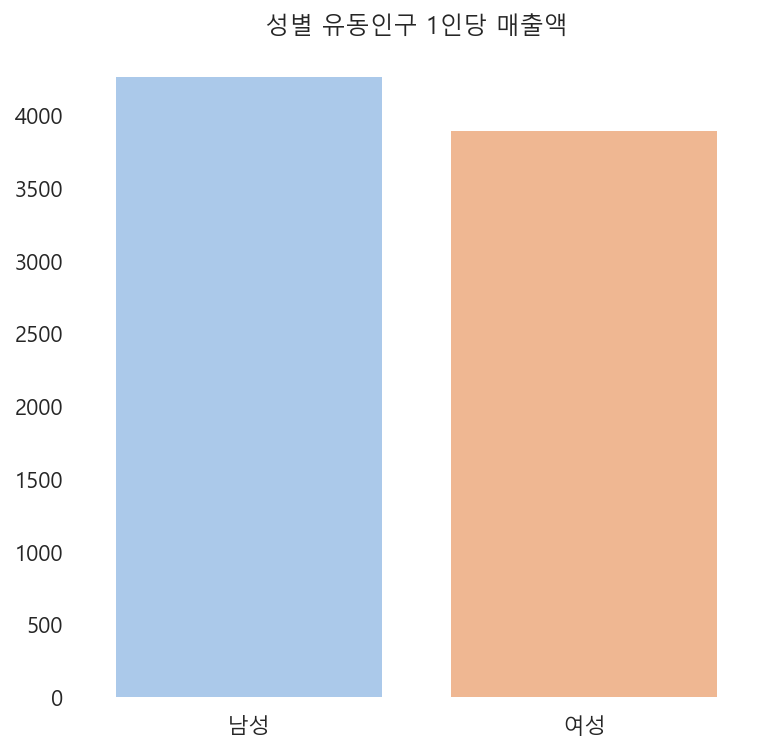

In [53]:
data = pd.DataFrame(columns=["남성", "여성"])
data.loc[0] = [popmoney["남성_매출_금액"].sum()/popmoney["남성_유동인구_수"].sum(),
      popmoney["여성_매출_금액"].sum()/popmoney["여성_유동인구_수"].sum()]

fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(data = data, ci = None, palette="pastel", )
plt.title("성별 유동인구 1인당 매출액")
ax.set_facecolor('white')
plt.show()

### 유동인구 시간대 대비 매출액
- 새벽 아침 시간대가 많이 낮음
- 저녁 시간대도 의외로 매출 낮음

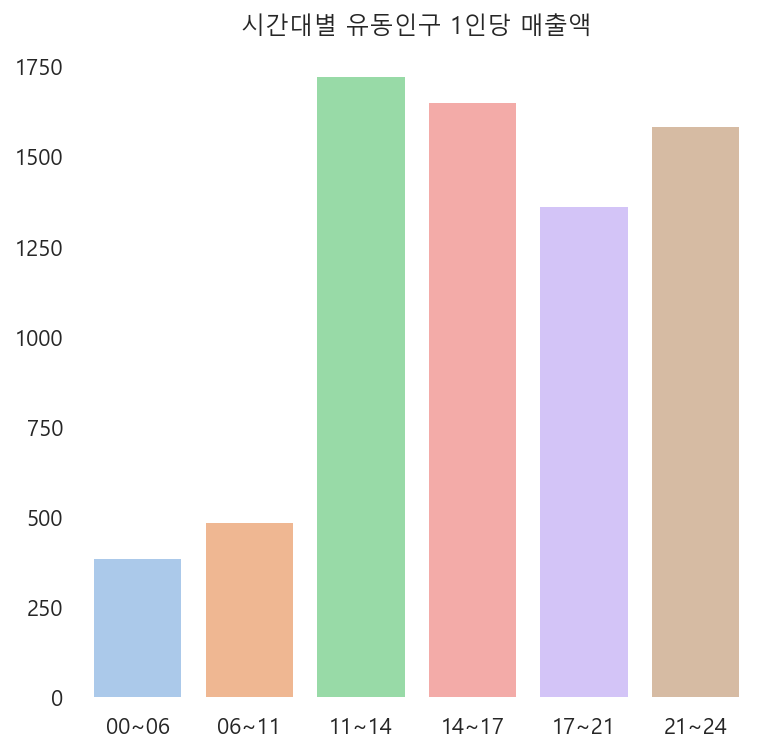

In [54]:
data = pd.DataFrame(columns=["00~06", "06~11", "11~14", "14~17", "17~21", "21~24"])
data.loc[0] = [(popmoney["시간대_00~06_매출_금액"].sum()/popmoney["시간대_1_유동인구_수"].sum())/6,
(popmoney["시간대_06~11_매출_금액"].sum()/popmoney["시간대_2_유동인구_수"].sum())/5,
(popmoney["시간대_11~14_매출_금액"].sum()/popmoney["시간대_3_유동인구_수"].sum())/3,
(popmoney["시간대_14~17_매출_금액"].sum()/popmoney["시간대_4_유동인구_수"].sum())/3,
(popmoney["시간대_17~21_매출_금액"].sum()/popmoney["시간대_5_유동인구_수"].sum())/4,
(popmoney["시간대_21~24_매출_금액"].sum()/popmoney["시간대_6_유동인구_수"].sum())/3]

fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(data = data, ci = None, palette="pastel")
plt.title("시간대별 유동인구 1인당 매출액")
ax.set_facecolor('white')
plt.show()

### 유동인구 요일 대비 매출액
- 토요일이 눈에 띄게 높음
- 일요일이 가장 낮음

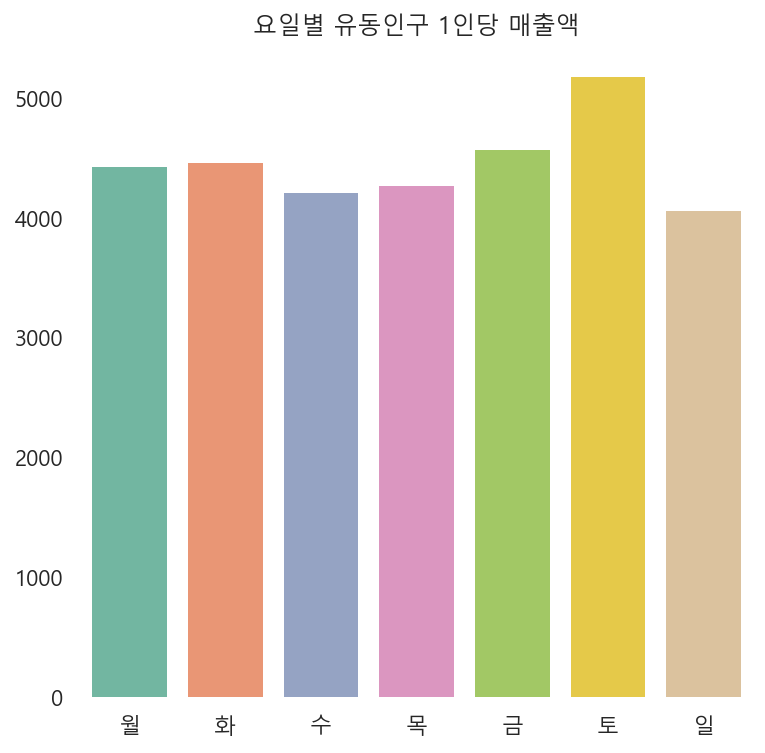

In [55]:
data = pd.DataFrame(columns=["월", "화", "수", "목", "금", "토", "일"])
data.loc[0] = [round(popmoney["월요일_매출_금액"].sum() / popmoney["월요일_유동인구_수"].sum()),
round(popmoney["화요일_매출_금액"].sum() / popmoney["화요일_유동인구_수"].sum()),
round(popmoney["수요일_매출_금액"].sum() / popmoney["수요일_유동인구_수"].sum()),
round(popmoney["목요일_매출_금액"].sum() / popmoney["목요일_유동인구_수"].sum()),
round(popmoney["금요일_매출_금액"].sum() / popmoney["금요일_유동인구_수"].sum()),
round(popmoney["토요일_매출_금액"].sum() / popmoney["토요일_유동인구_수"].sum()),
round(popmoney["일요일_매출_금액"].sum() / popmoney["일요일_유동인구_수"].sum())]

fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(data = data, ci = None, palette="Set2")
plt.title("요일별 유동인구 1인당 매출액")
ax.set_facecolor('white')
plt.show()

### 유동인구와 매출의 상관관계 분석